In this project I'm going to model diamond prices using Linear Regression

Here is the plan:

1) Loading the dataset and familiarizing with the data
2) Data Transformation and Exploratory Data Analysis (EDA)
3) Feature engineering
4) Modelling
5) Model Evaluation

1) Loading the dataset and familiarizing with the data

In [607]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [608]:
zf = zipfile.ZipFile('Data/diamonds.zip') 
df = pd.read_csv(zf.open('diamonds.csv'),index_col=0)
df.head(10)

carat        cut color clarity  depth  table  price     x     y     z
1    0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2    0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3    0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4    0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5    0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
6    0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
7    0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
8    0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
9    0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
10   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39

In [609]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


2) Data Transformation and Exploratory Data Analysis (EDA)

In [610]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [611]:
df.describe(include = 'all')

carat    cut  color clarity         depth         table  \
count   53940.000000  53940  53940   53940  53940.000000  53940.000000   
unique           NaN      5      7       8           NaN           NaN   
top              NaN  Ideal      G     SI1           NaN           NaN   
freq             NaN  21551  11292   13065           NaN           NaN   
mean        0.797940    NaN    NaN     NaN     61.749405     57.457184   
std         0.474011    NaN    NaN     NaN      1.432621      2.234491   
min         0.200000    NaN    NaN     NaN     43.000000     43.000000   
25%         0.400000    NaN    NaN     NaN     61.000000     56.000000   
50%         0.700000    NaN    NaN     NaN     61.800000     57.000000   
75%         1.040000    NaN    NaN     NaN     62.500000     59.000000   
max         5.010000    NaN    NaN     NaN     79.000000     95.000000   

               price             x             y             z  
count   53940.000000  53940.000000  53940.000000  53940.000000  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean     3932.799722      5.731157      5.734526      3.538734  
std      3989.439738      1.121761      1.142135      0.705699  
min       326.000000      0.000000      0.000000      0.000000  
25%       950.000000      4.710000      4.720000      2.910000  
50%      2401.000000      5.700000      5.710000      3.530000  
75%      5324.250000      6.540000      6.540000      4.040000  
max     18823.000000     10.740000     58.900000     31.800000

We do not observe Nulls in the data but for Columns 'x', 'y', 'z' minimum value is 0.

In [612]:
print(df.select_dtypes(include='number').columns)
print(df.select_dtypes(include='object').columns)

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')
Index(['cut', 'color', 'clarity'], dtype='object')


In [613]:
#Let's look at data values and check for the wrong entries

for col in df.columns:
    print('{} : {}'.format(col, df[col].unique()))

carat : [0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.04 2.12
 1.77 2.5  1.8  1.67 1.84 2.2  3.01 1.88 2.33 2.68 2.34 1.9  2.16 2.74
 

In [614]:
#Let's look at 0 values for 'X', 'Y' and 'Z'

df[df['x']*df['y']*df['z'] == 0]

carat        cut color clarity  depth  table  price     x     y    z
2208    1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48  0.0
2315    1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60  0.0
4792    1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47  0.0
5472    1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47  0.0
10168   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04  0.0
11183   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00  6.62  0.0
11964   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00  0.00  0.0
13602   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83  0.0
15952   1.14       Fair     G     VS1   57.5   67.0   6381  0.00  0.00  0.0
24395   2.18    Premium     H     SI2   59.4   61.0  12631  8.49  8.45  0.0
24521   1.56      Ideal     G     VS2   62.2   54.0  12800  0.00  0.00  0.0
26124   2.25    Premium     I     SI1   61.3   58.0  15397  8.52  8.42  0.0
26244   1.20    Premium     D    VVS1   62.1   59.0  15686  0.00  0.00  0.0
27113   2.20    Premium     H     SI1   61.2   59.0  17265  8.42  8.37  0.0
27430   2.25    Premium     H     SI2   62.8   59.0  18034  0.00  0.00  0.0
27504   2.02    Premium     H     VS2   62.7   53.0  18207  8.02  7.95  0.0
27740   2.80       Good     G     SI2   63.8   58.0  18788  8.90  8.85  0.0
49557   0.71       Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.0
49558   0.71       Good     F     SI2   64.1   60.0   2130  0.00  0.00  0.0
51507   1.12    Premium     G      I1   60.4   59.0   2383  6.71  6.67  0.0

We see that despite there are some 0 values for 'x', 'y' and 'z' the 'depth' value is calculated and it is nonzero. Let's have a check

In [615]:
for col in df.columns:
    df[col].replace({0: np.nan},inplace=True)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53932 non-null  float64
 8   y        53933 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [616]:
df_nan = df[df['z'].isnull()]
df_nan

carat        cut color clarity  depth  table  price     x     y   z
2208    1.00    Premium     G     SI2   59.1   59.0   3142  6.55  6.48 NaN
2315    1.01    Premium     H      I1   58.1   59.0   3167  6.66  6.60 NaN
4792    1.10    Premium     G     SI2   63.0   59.0   3696  6.50  6.47 NaN
5472    1.01    Premium     F     SI2   59.2   58.0   3837  6.50  6.47 NaN
10168   1.50       Good     G      I1   64.0   61.0   4731  7.15  7.04 NaN
11183   1.07      Ideal     F     SI2   61.6   56.0   4954   NaN  6.62 NaN
11964   1.00  Very Good     H     VS2   63.3   53.0   5139   NaN   NaN NaN
13602   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88  6.83 NaN
15952   1.14       Fair     G     VS1   57.5   67.0   6381   NaN   NaN NaN
24395   2.18    Premium     H     SI2   59.4   61.0  12631  8.49  8.45 NaN
24521   1.56      Ideal     G     VS2   62.2   54.0  12800   NaN   NaN NaN
26124   2.25    Premium     I     SI1   61.3   58.0  15397  8.52  8.42 NaN
26244   1.20    Premium     D    VVS1   62.1   59.0  15686   NaN   NaN NaN
27113   2.20    Premium     H     SI1   61.2   59.0  17265  8.42  8.37 NaN
27430   2.25    Premium     H     SI2   62.8   59.0  18034   NaN   NaN NaN
27504   2.02    Premium     H     VS2   62.7   53.0  18207  8.02  7.95 NaN
27740   2.80       Good     G     SI2   63.8   58.0  18788  8.90  8.85 NaN
49557   0.71       Good     F     SI2   64.1   60.0   2130   NaN   NaN NaN
49558   0.71       Good     F     SI2   64.1   60.0   2130   NaN   NaN NaN
51507   1.12    Premium     G      I1   60.4   59.0   2383  6.71  6.67 NaN

In [617]:
df['depth_check'] = round(df['z']/df[['x', 'y']].mean(axis = 1)*100, 1)
df_incorrect = df[ abs(df['depth'] - df['depth_check']) > 1 ]
df_incorrect

carat        cut color clarity  depth  table  price     x     y     z  \
2275    1.22    Premium     J     SI2   62.6   59.0   3156  6.79  4.24  3.76   
2350    0.70      Ideal     G     VS2   62.7   54.0   3172  5.65  5.70  3.65   
2942    1.00  Very Good     J     SI2   62.8   63.0   3293  6.26  6.19  3.19   
3512    0.70    Premium     E      IF   62.9   59.0   3403  5.66  5.59  3.40   
4125    1.01       Fair     F     SI2   64.6   59.0   3540  6.19  6.25  4.20   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
51861   0.76    Premium     H     SI1   60.0   60.0   2425  5.80  5.76  3.76   
52261   0.78    Premium     H     SI1   60.0   60.0   2489  5.93  5.92  3.62   
53005   0.70    Premium     F     SI1   60.0   60.0   2596  5.62  5.55  3.60   
53006   0.70    Premium     D     SI2   60.0   60.0   2596  5.72  5.56  3.50   
53728   0.78       Fair     E     SI2   66.9   57.0   2721  5.70  5.66  3.60   

       depth_check  
2275          68.2  
2350          64.3  
2942          51.2  
3512          60.4  
4125          67.5  
...            ...  
51861         65.1  
52261         61.1  
53005         64.5  
53006         62.1  
53728         63.4  

[72 rows x 11 columns]

In [618]:
df_incorrect.count()

carat          72
cut            72
color          72
clarity        72
depth          72
table          72
price          72
x              72
y              72
z              72
depth_check    72
dtype: int64

So some values are incorrect. We don't know if it is the 'depth' column with the wrong values or some of 'x', 'y', 'z' coulumns. 
Anyway we can fill some 0 valuez for 'z' using 'x', 'y' and 'depth'.

In [619]:

df.fillna({"z": round(df['depth']*(df['x'] + df['y'])/2/100, 2)}, inplace=True)
df[df['z'].isna()]

carat        cut color clarity  depth  table  price   x     y   z  \
11183   1.07      Ideal     F     SI2   61.6   56.0   4954 NaN  6.62 NaN   
11964   1.00  Very Good     H     VS2   63.3   53.0   5139 NaN   NaN NaN   
15952   1.14       Fair     G     VS1   57.5   67.0   6381 NaN   NaN NaN   
24521   1.56      Ideal     G     VS2   62.2   54.0  12800 NaN   NaN NaN   
26244   1.20    Premium     D    VVS1   62.1   59.0  15686 NaN   NaN NaN   
27430   2.25    Premium     H     SI2   62.8   59.0  18034 NaN   NaN NaN   
49557   0.71       Good     F     SI2   64.1   60.0   2130 NaN   NaN NaN   
49558   0.71       Good     F     SI2   64.1   60.0   2130 NaN   NaN NaN   

       depth_check  
11183          NaN  
11964          NaN  
15952          NaN  
24521          NaN  
26244          NaN  
27430          NaN  
49557          NaN  
49558          NaN

We are not going to get rid of NaN values yet as we don't know whether we are going to use 'x','y','z' column in our analysis.
But we can get rid of 'depth_check' for now.

In [620]:
df.drop('depth_check',axis = 1, inplace=True)

Let's search for the duplicated values

In [621]:
df.duplicated().sum()

146

In [622]:
df[df.duplicated()]

carat    cut color clarity  depth  table  price     x     y     z
1006    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1007    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1008    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1009    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
2026    1.52   Good     E      I1   57.3   58.0   3105  7.53  7.42  4.28
...      ...    ...   ...     ...    ...    ...    ...   ...   ...   ...
47970   0.52  Ideal     D     VS2   61.8   55.0   1919  5.19  5.16  3.20
49327   0.51  Ideal     F    VVS2   61.2   56.0   2093  5.17  5.19  3.17
49558   0.71   Good     F     SI2   64.1   60.0   2130   NaN   NaN   NaN
50080   0.51  Ideal     F    VVS2   61.2   56.0   2203  5.19  5.17  3.17
52862   0.50   Fair     E     VS2   79.0   73.0   2579  5.21  5.18  4.09

[146 rows x 10 columns]

We can't be sure that if there is a coincidence in the data or those are real duplicates.
However the number of duplicates is relatively small, so we can drop them without loosing much.

In [623]:
df.drop_duplicates(inplace=True)

In [624]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53787 non-null  float64
 8   y        53788 non-null  float64
 9   z        53787 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


Now let's make our columns with an oblect type categorical, specifying an order

In [625]:
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J','I','H','G','F','E','D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

order_cut = pd.api.types.CategoricalDtype(categories = cut_order, ordered = True)
order_color = pd.api.types.CategoricalDtype(categories = color_order, ordered = True)
order_clarity = pd.api.types.CategoricalDtype(categories = clarity_order, ordered = True)

df.cut = df.cut.astype(order_cut)
df.color = df.color.astype(order_color)
df.clarity = df.clarity.astype(order_clarity)

df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53794 non-null  float64 
 1   cut      53794 non-null  category
 2   color    53794 non-null  category
 3   clarity  53794 non-null  category
 4   depth    53794 non-null  float64 
 5   table    53794 non-null  float64 
 6   price    53794 non-null  int64   
 7   x        53787 non-null  float64 
 8   y        53788 non-null  float64 
 9   z        53787 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


In [626]:
df['volume'] = df['x']*df['y']*df['z'] #kind of pre feature engineering to reduce number of variables in scope 

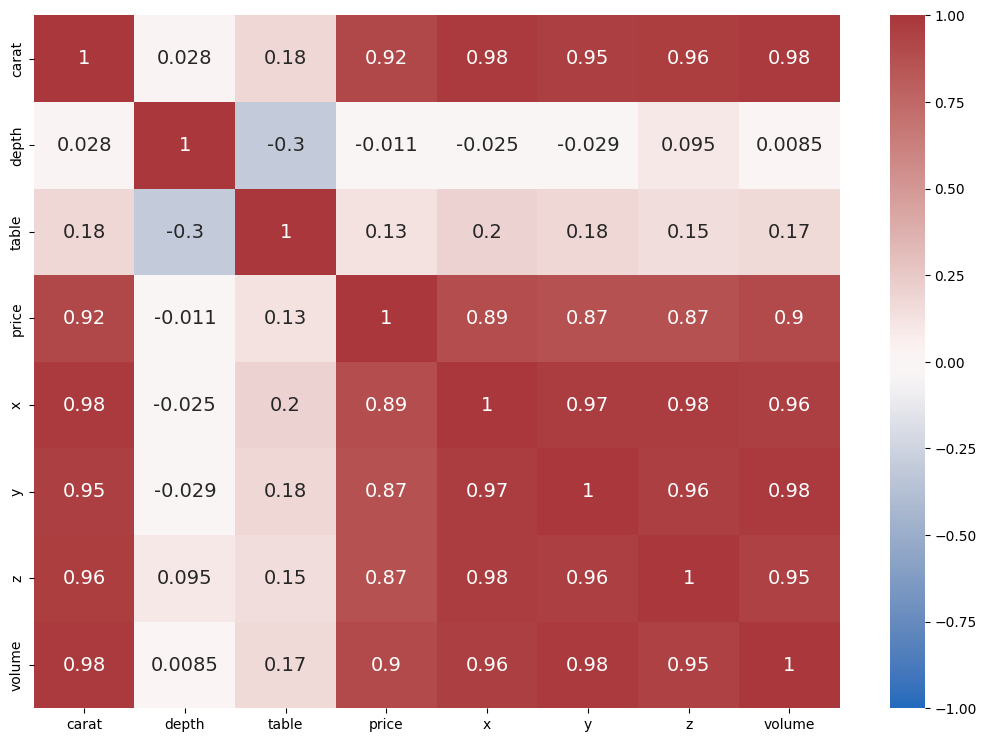

In [627]:
corr = df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize = (13,9))
sns.heatmap(corr, 
            annot = True,                 # Correlation coeficients will be displayed in each cell
            annot_kws = {'fontsize':14},  # Setting a fontsize
            cmap = 'vlag',                # Setting a color map
            vmin = -1, vmax = 1);         # Setting min and max for color map 

There is a huge correlation between 'carat' and dimensional variables like 'x', 'y','z' of 'volume', 
so probably we will not need them in our further analysis.

Let's visually explore our data

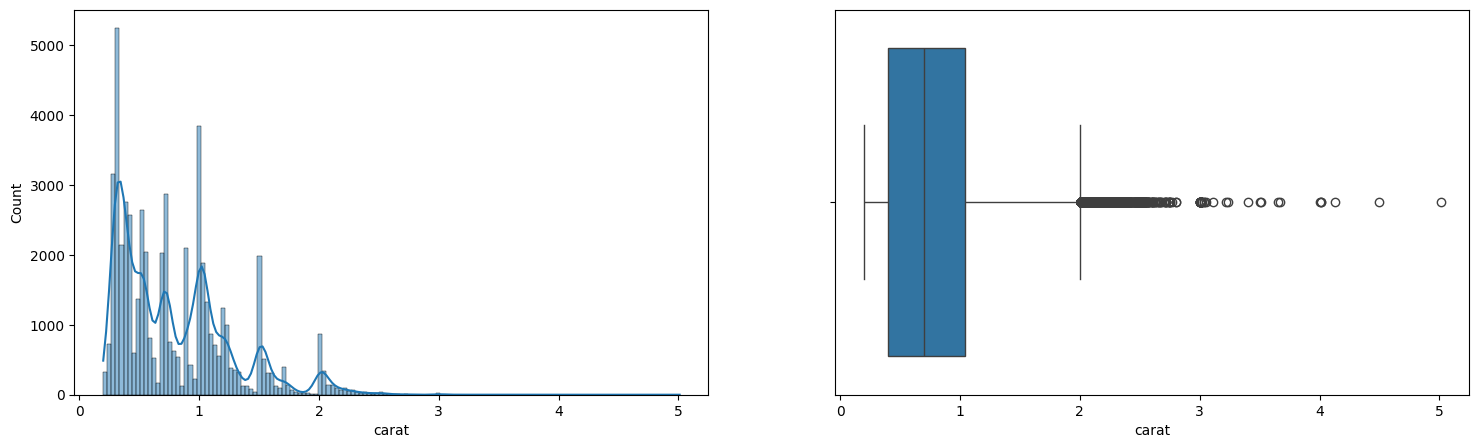

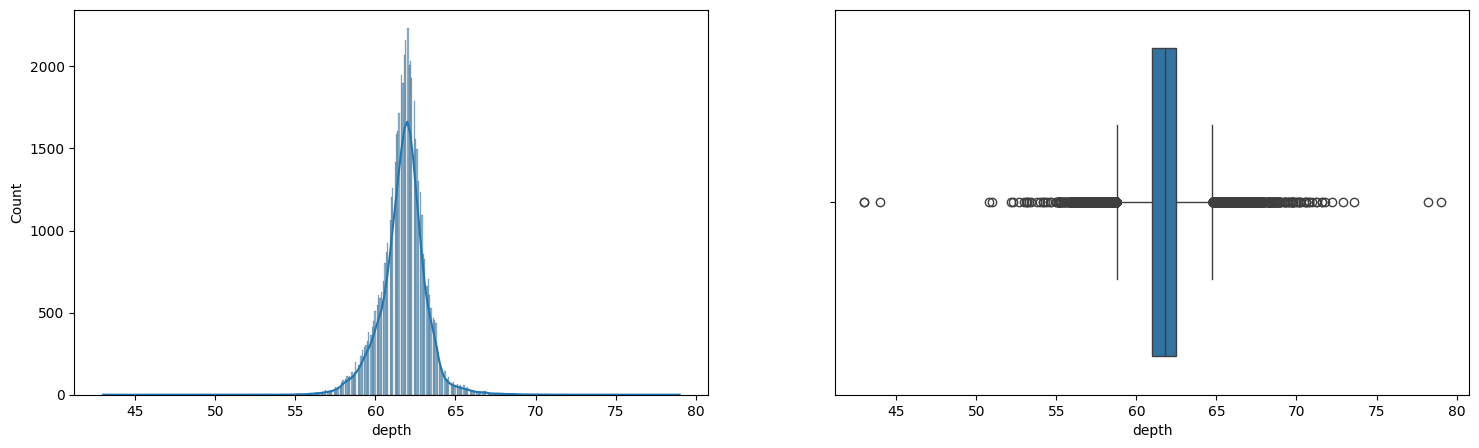

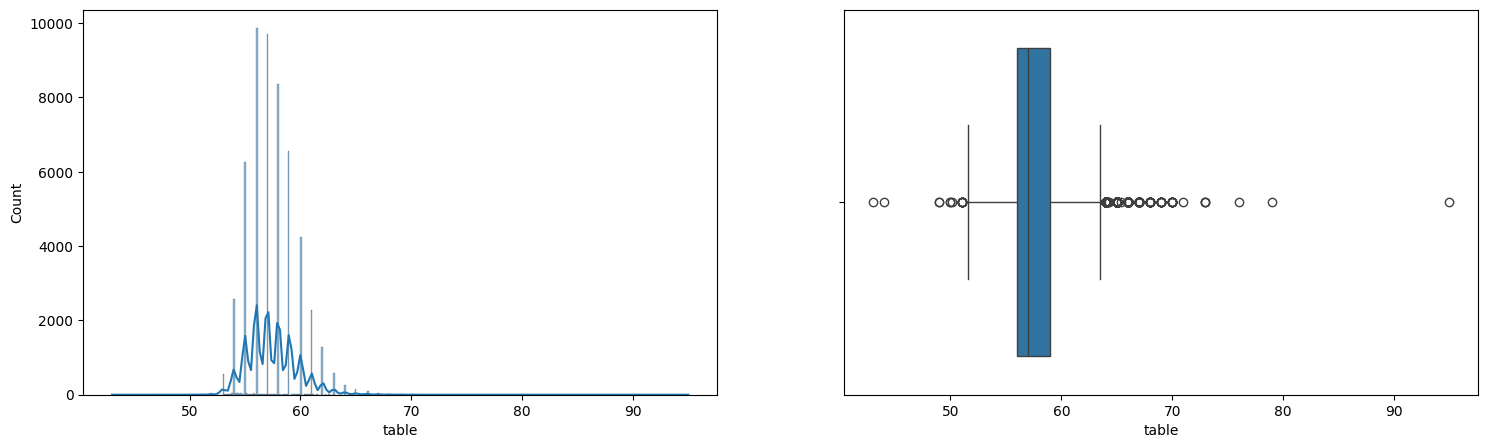

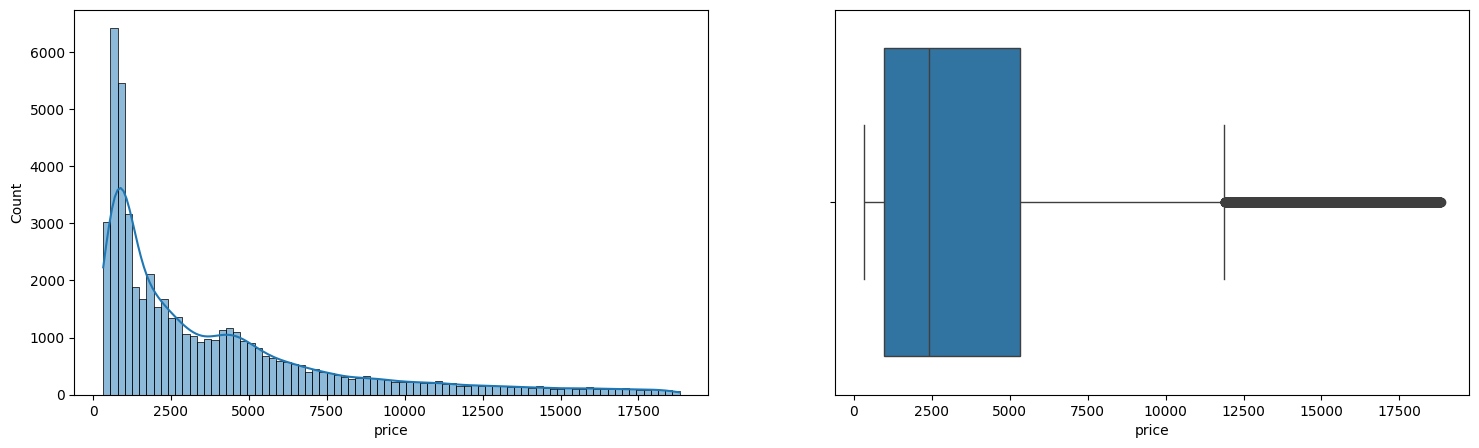

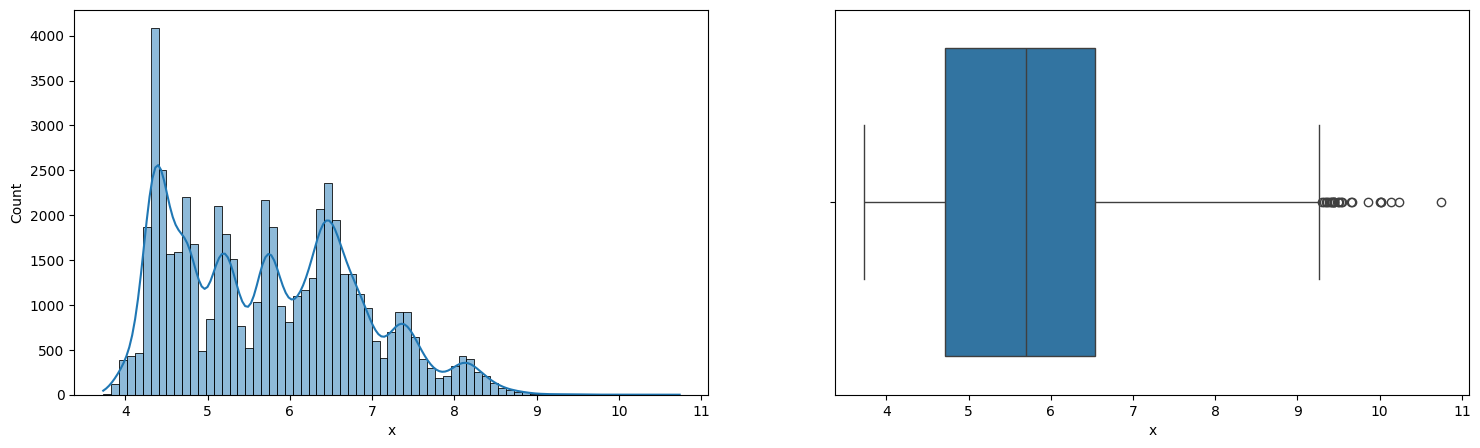

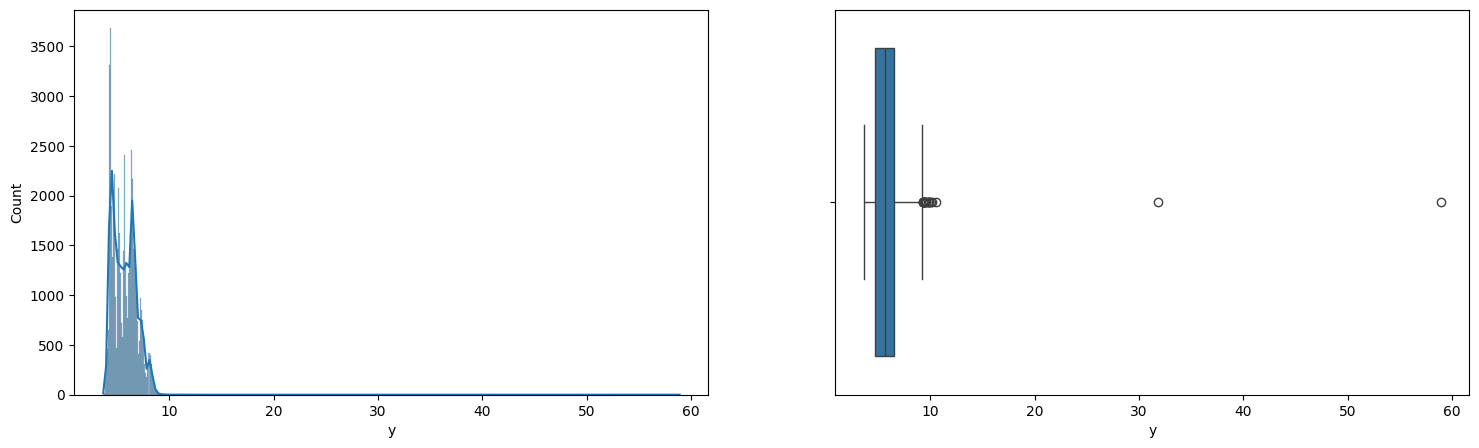

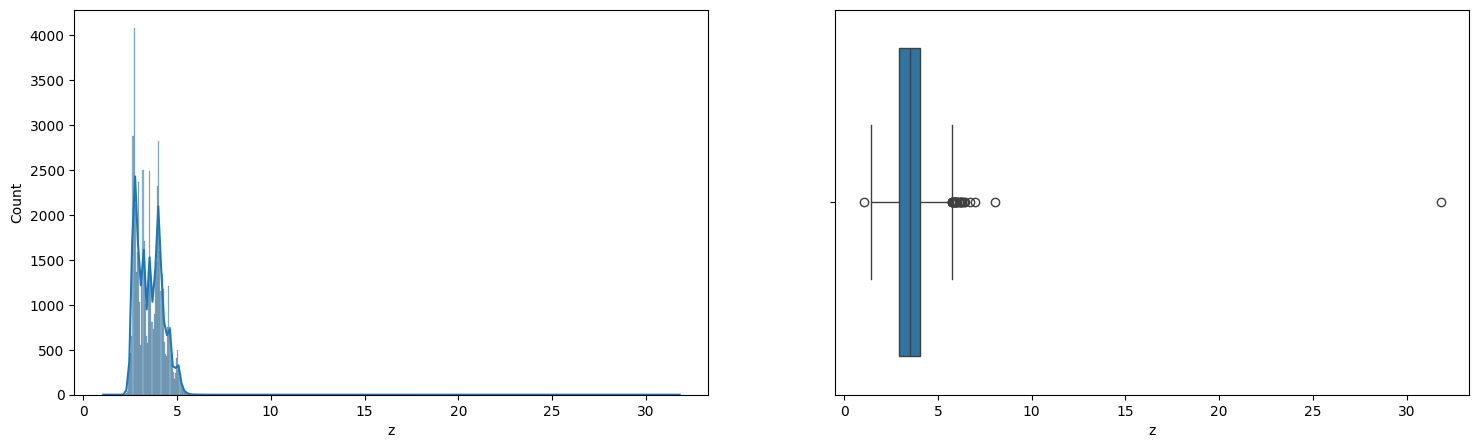

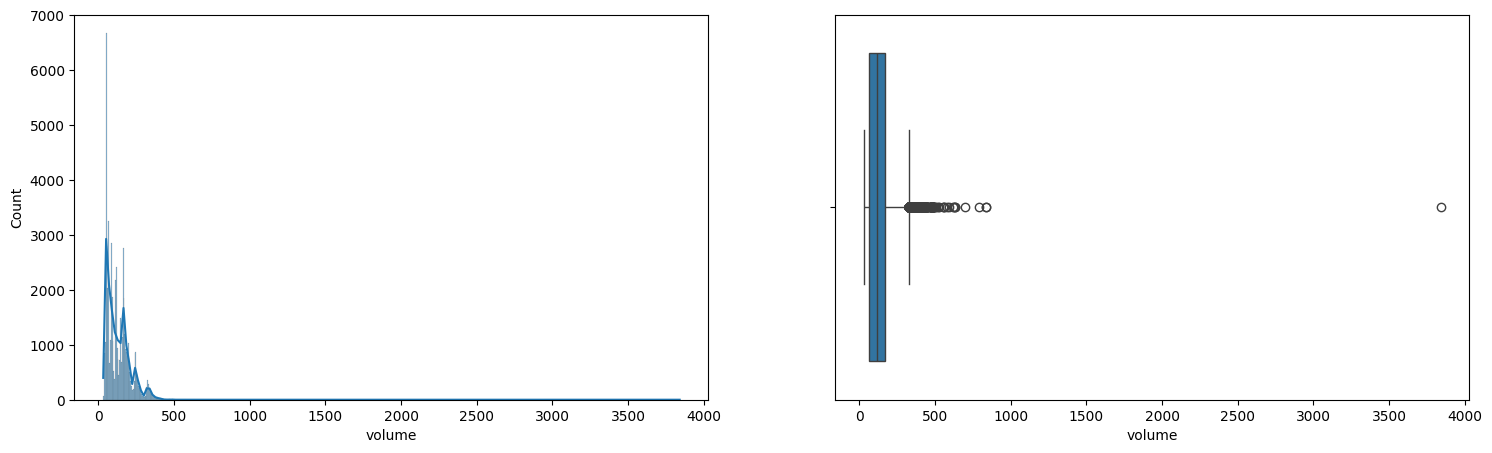

In [628]:
numeric_cols = df.select_dtypes(include='number').columns
categoric_cols = df.select_dtypes(include='category').columns
for col in numeric_cols:
    plt.figure(figsize = (18,5))
    plt.subplot(1,2,1)
    #sns.distplot(df[col])
    sns.histplot(df[col], kde = True)
    plt.subplot(1,2,2)
    sns.boxplot(x = col, data = df)
    plt.show()

Clearly we have some outliers in 'y' and 'z'

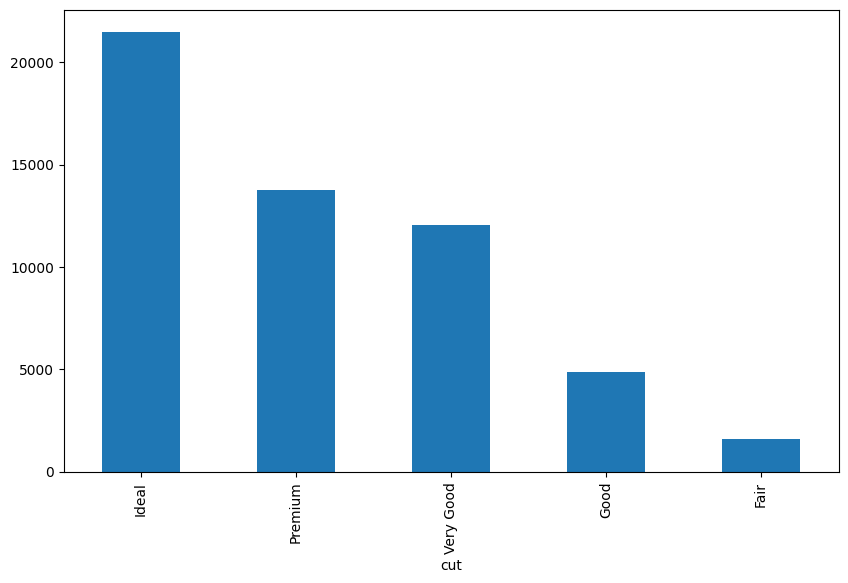

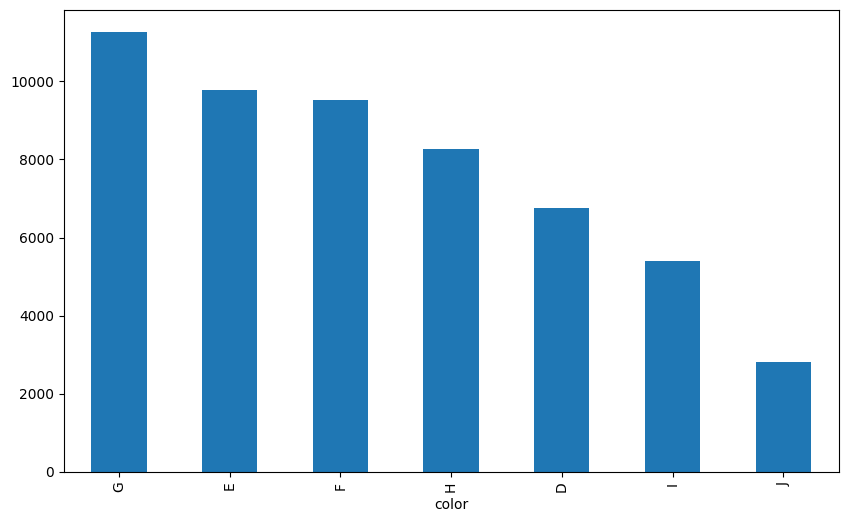

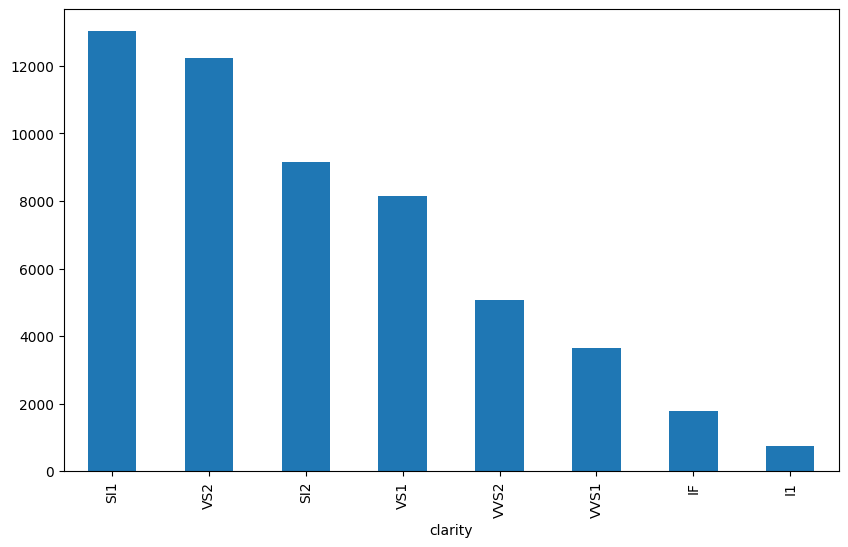

In [629]:
for col in categoric_cols:
    plt.figure(figsize = (18,5))
    df[col].value_counts().plot(kind="bar", figsize=(10,6))

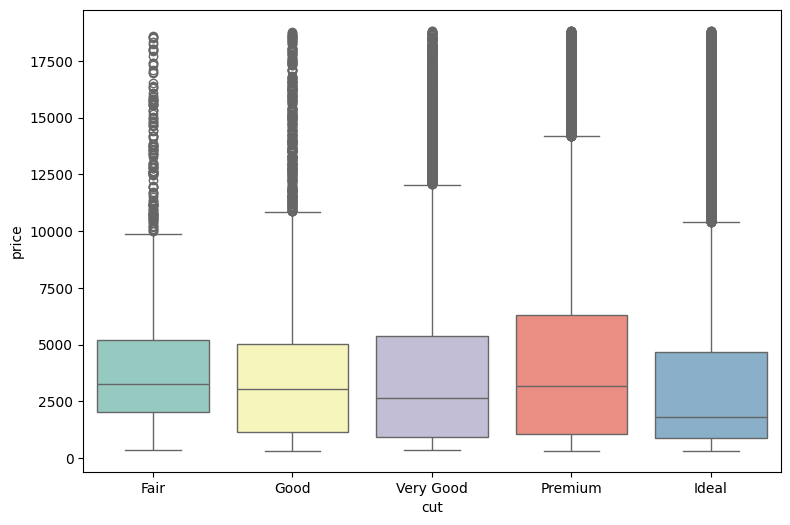

In [630]:
plt.figure(figsize = (9,6))
sns.boxplot(data = df, 
            x = 'cut', 
            y = 'price', 
            palette = 'Set3', hue = 'cut');

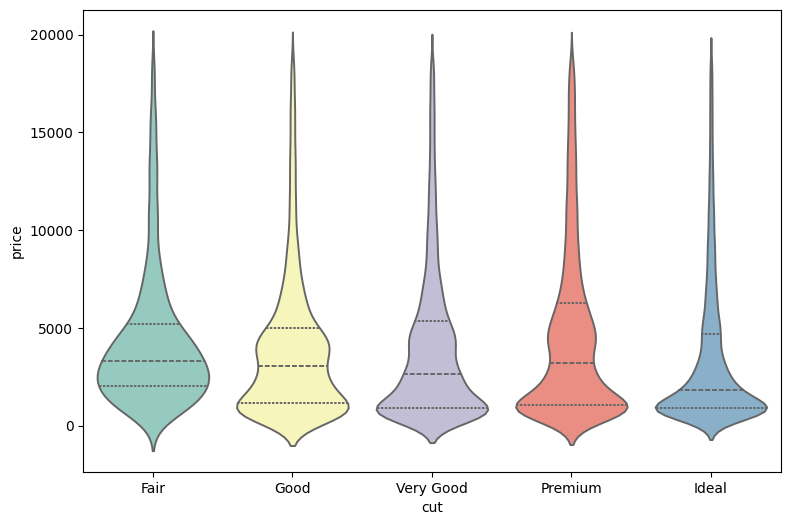

In [631]:
plt.figure(figsize = (9,6))
ax = sns.violinplot(df, 
            x = 'cut', 
            y = 'price', 
            palette = 'Set3', hue = 'cut',
                    inner = 'quartile',
                    linewidth = 1.4,
                    );

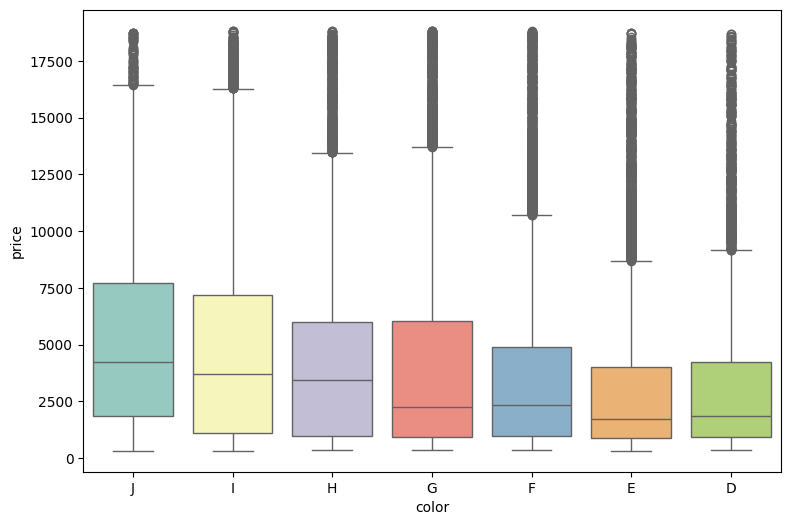

In [632]:
plt.figure(figsize = (9,6))
sns.boxplot(data = df, 
            x = 'color', 
            y = 'price', 
            palette = 'Set3', hue = 'color');

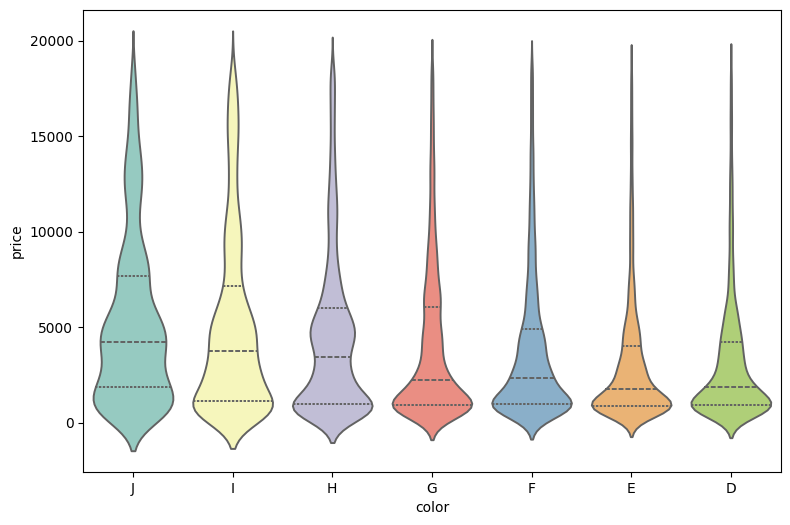

In [633]:
plt.figure(figsize = (9,6))
ax = sns.violinplot(df, 
            x = 'color', 
            y = 'price', 
            palette = 'Set3', hue = 'color',
                    inner = 'quartile',
                    linewidth = 1.4,
                    );

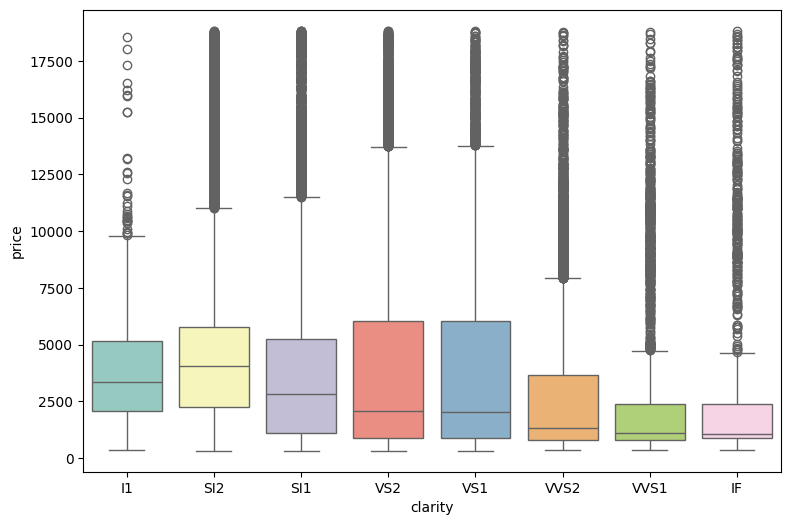

In [634]:
plt.figure(figsize = (9,6))
sns.boxplot(data = df, 
            x = 'clarity', 
            y = 'price', 
            palette = 'Set3', hue = 'clarity');

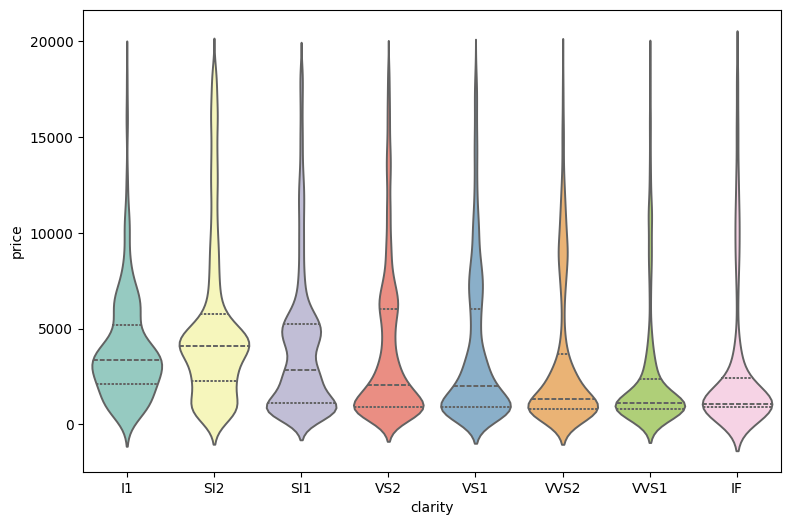

In [635]:
plt.figure(figsize = (9,6))
ax = sns.violinplot(df, 
            x = 'clarity', 
            y = 'price', 
            palette = 'Set3', hue = 'clarity',
                    inner = 'quartile',
                    linewidth = 1.4,
                    );

Strangely enough the better a diamond is it terms of quality (cut, color or clarity) the smaller median price. So maybe there is a huge difference in 'carat' variable

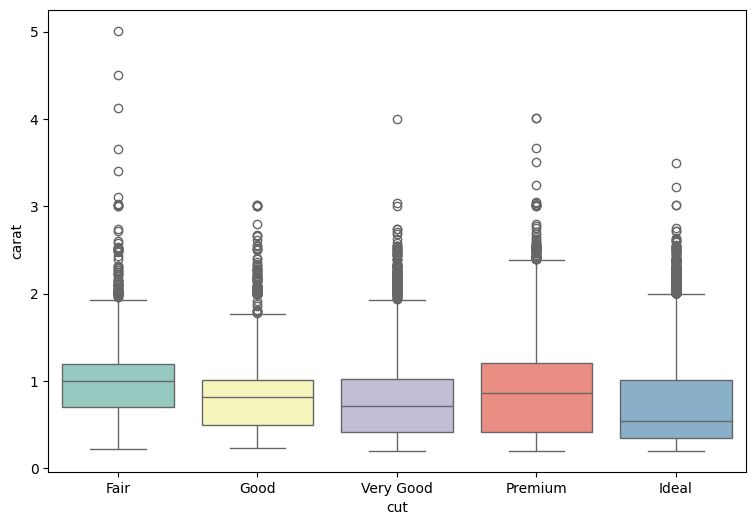

In [636]:
plt.figure(figsize = (9,6))
sns.boxplot(data = df, 
            x = 'cut', 
            y = 'carat', 
            palette = 'Set3', hue = 'cut');

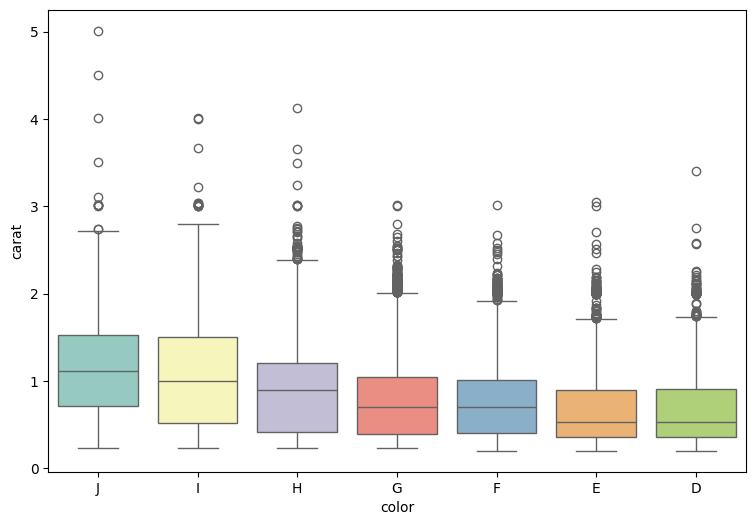

In [637]:
plt.figure(figsize = (9,6))
sns.boxplot(data = df, 
            x = 'color', 
            y = 'carat', 
            palette = 'Set3', hue = 'color');

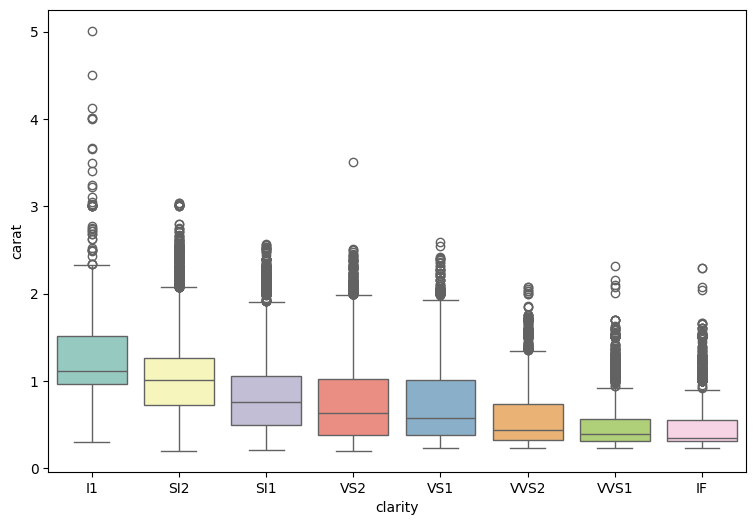

In [638]:
plt.figure(figsize = (9,6))
sns.boxplot(data = df, 
            x = 'clarity', 
            y = 'carat', 
            palette = 'Set3', hue = 'clarity');

Indeed, from boxplots we see that diamonds with better quality tend to be smaller in terms of 'carat' value, so probably this is why the median price goes down also.

Let's try to cach a dependency between our categorical values and the price using multivariate analysis.

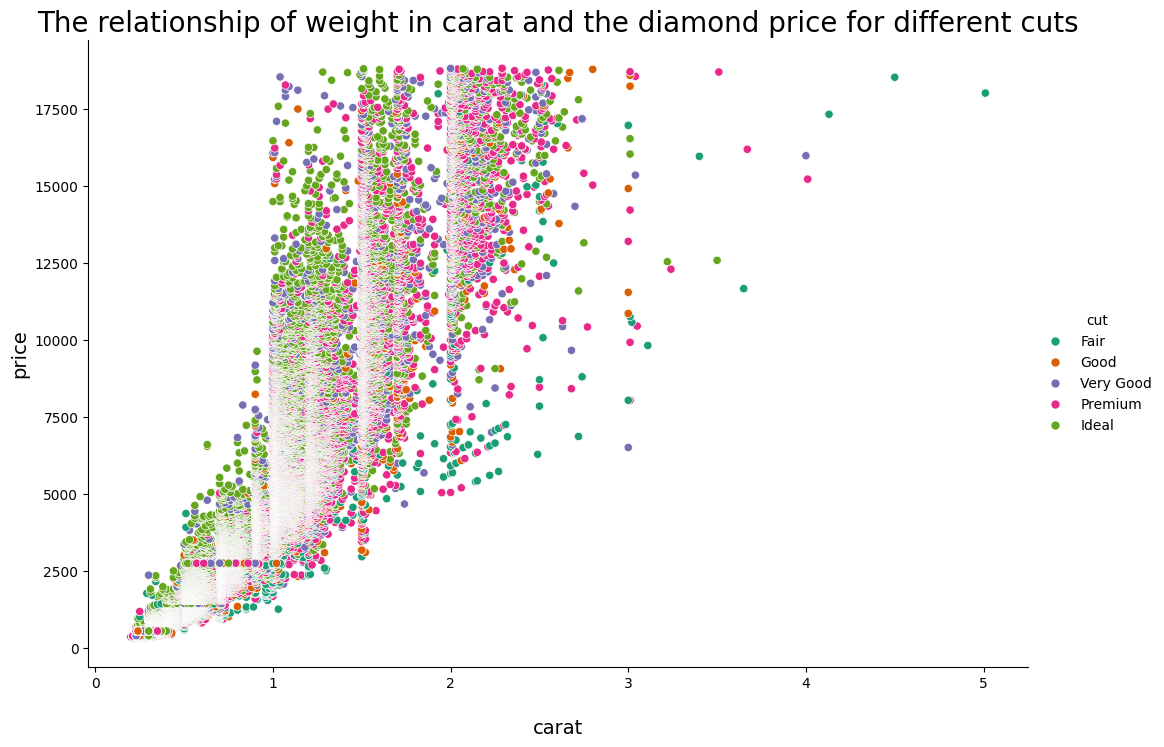

In [639]:
sns.relplot(data = df, 
            x = 'carat', 
            y = 'price', 
            hue = 'cut',
            palette = 'Dark2',
            height = 7,
            aspect = 1.5,)
plt.xlabel('carat', fontsize = 14, labelpad = 20)     
plt.ylabel('price', fontsize = 14)
plt.title('The relationship of weight in carat and the diamond price for different cuts', fontsize = 20);

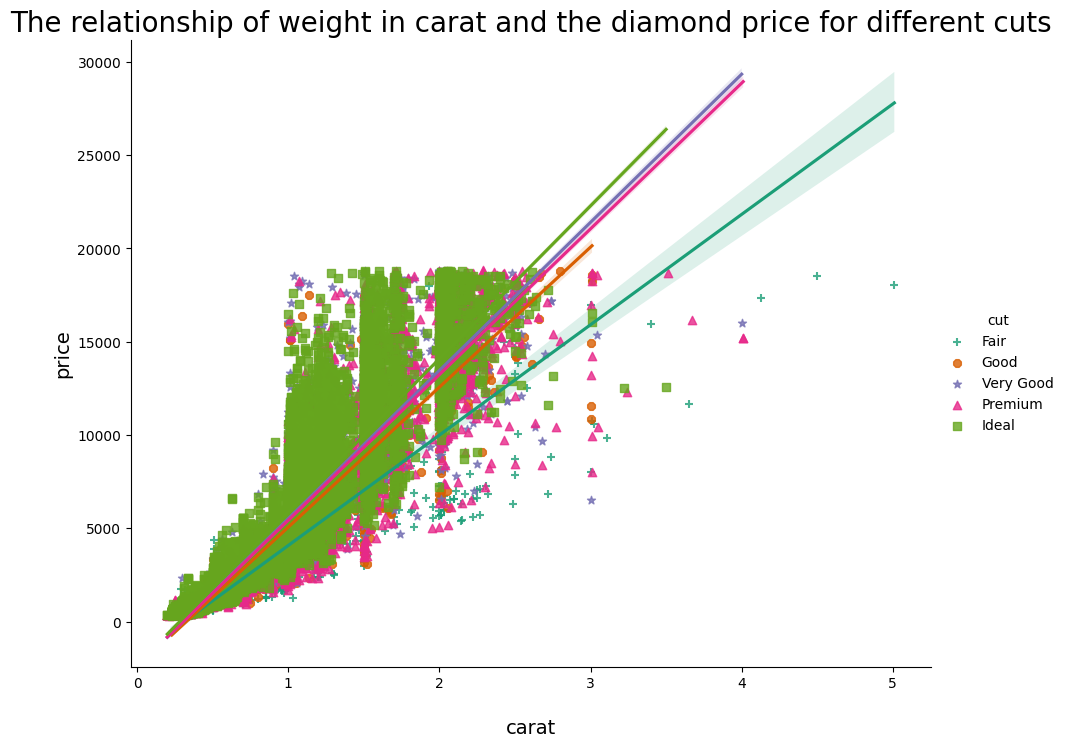

In [640]:
sns.lmplot(data = df, 
           x = 'carat', 
           y = 'price', 
           hue = 'cut', 
           markers = ['+','8','*','^', ','],
           palette = 'Dark2',
           height = 7,
           aspect = 1.3)
plt.xlabel('carat', fontsize = 14, labelpad = 20)     
plt.ylabel('price', fontsize = 14)
plt.title('The relationship of weight in carat and the diamond price for different cuts', fontsize = 20);

There's still quite a lot of data, so we could try to look at it separately.

<Figure size 800x800 with 0 Axes>

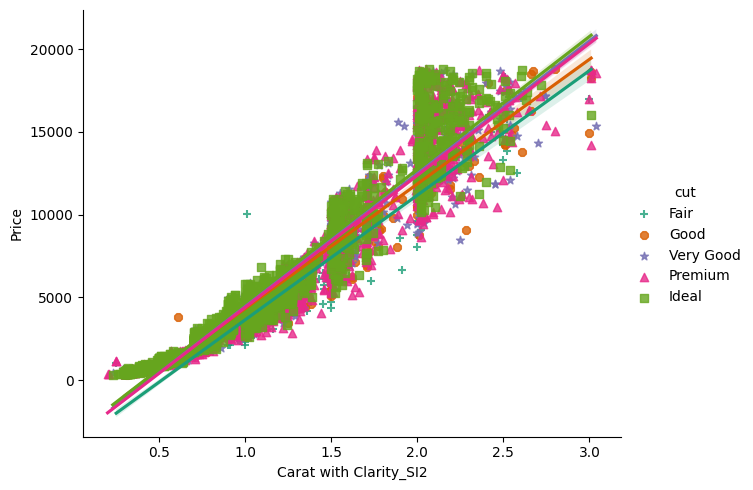

<Figure size 800x800 with 0 Axes>

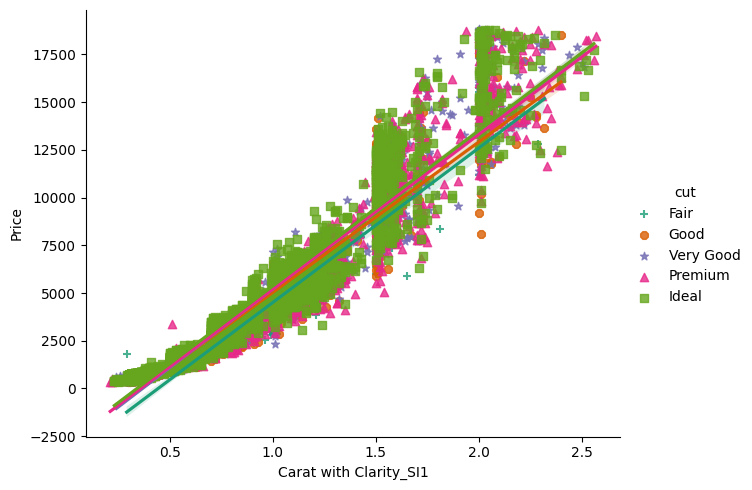

<Figure size 800x800 with 0 Axes>

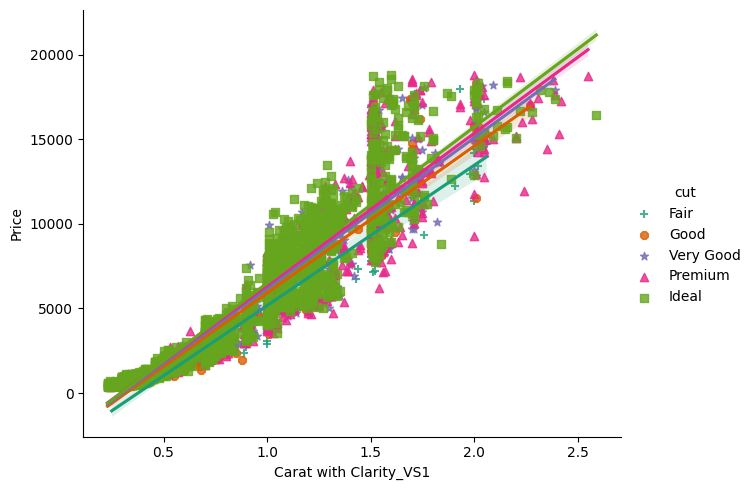

<Figure size 800x800 with 0 Axes>

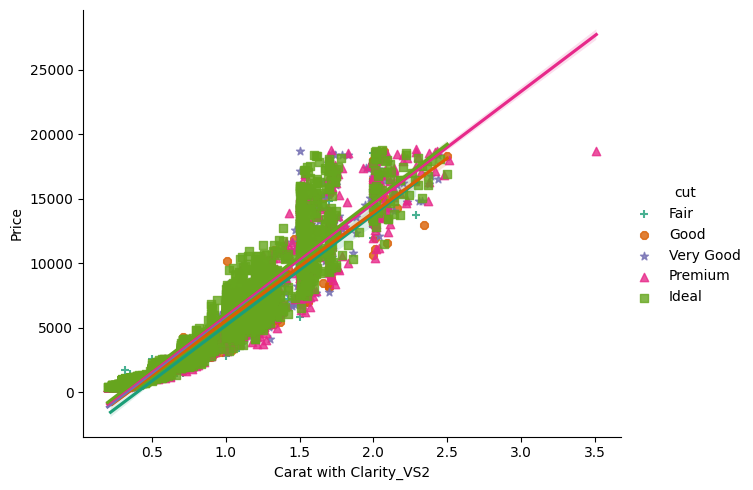

<Figure size 800x800 with 0 Axes>

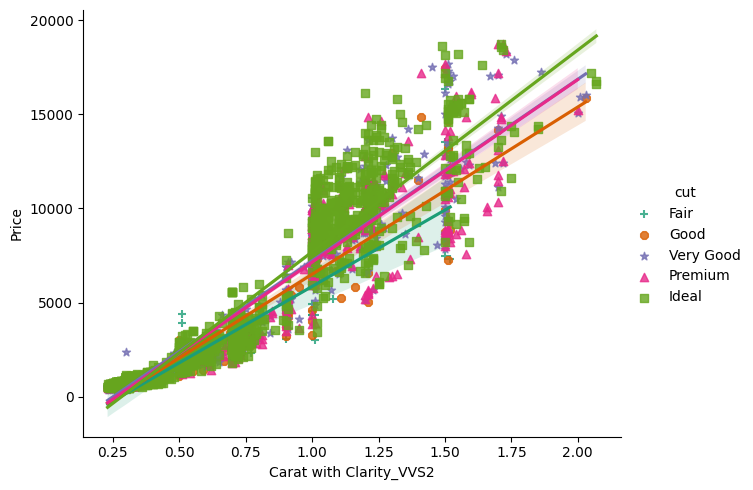

<Figure size 800x800 with 0 Axes>

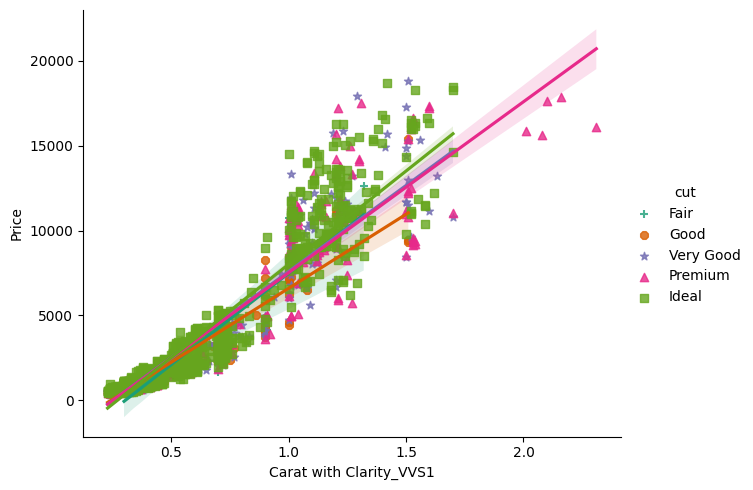

<Figure size 800x800 with 0 Axes>

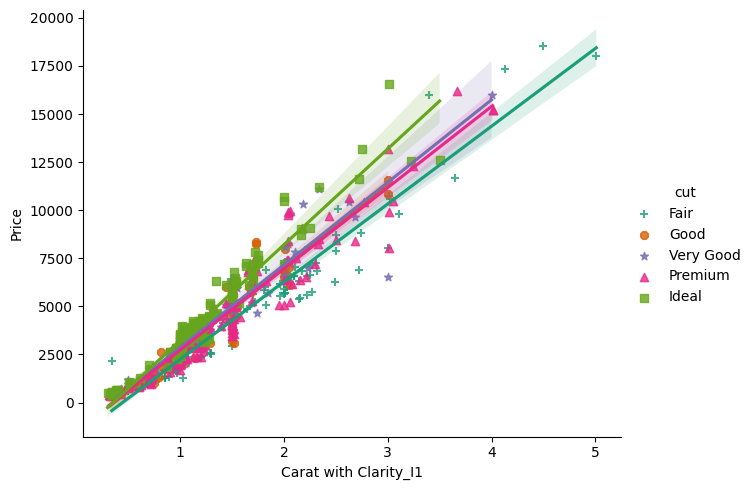

<Figure size 800x800 with 0 Axes>

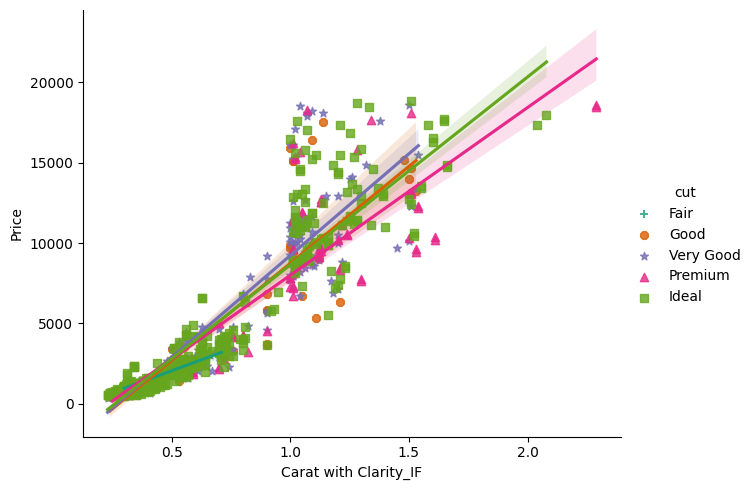

In [641]:
for i in df['clarity'].unique():
    plt.figure(figsize=(8,8))
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html  
    sns.lmplot(data = df[df['clarity'] == i], 
           x = 'carat', 
           y = 'price', 
           hue = 'cut', 
           markers = ['+','8','*','^', ','],
           palette = 'Dark2',
           height = 5,
           aspect = 1.3)
    plt.xlabel(f'Carat with Clarity_{i}')
    plt.ylabel('Price')

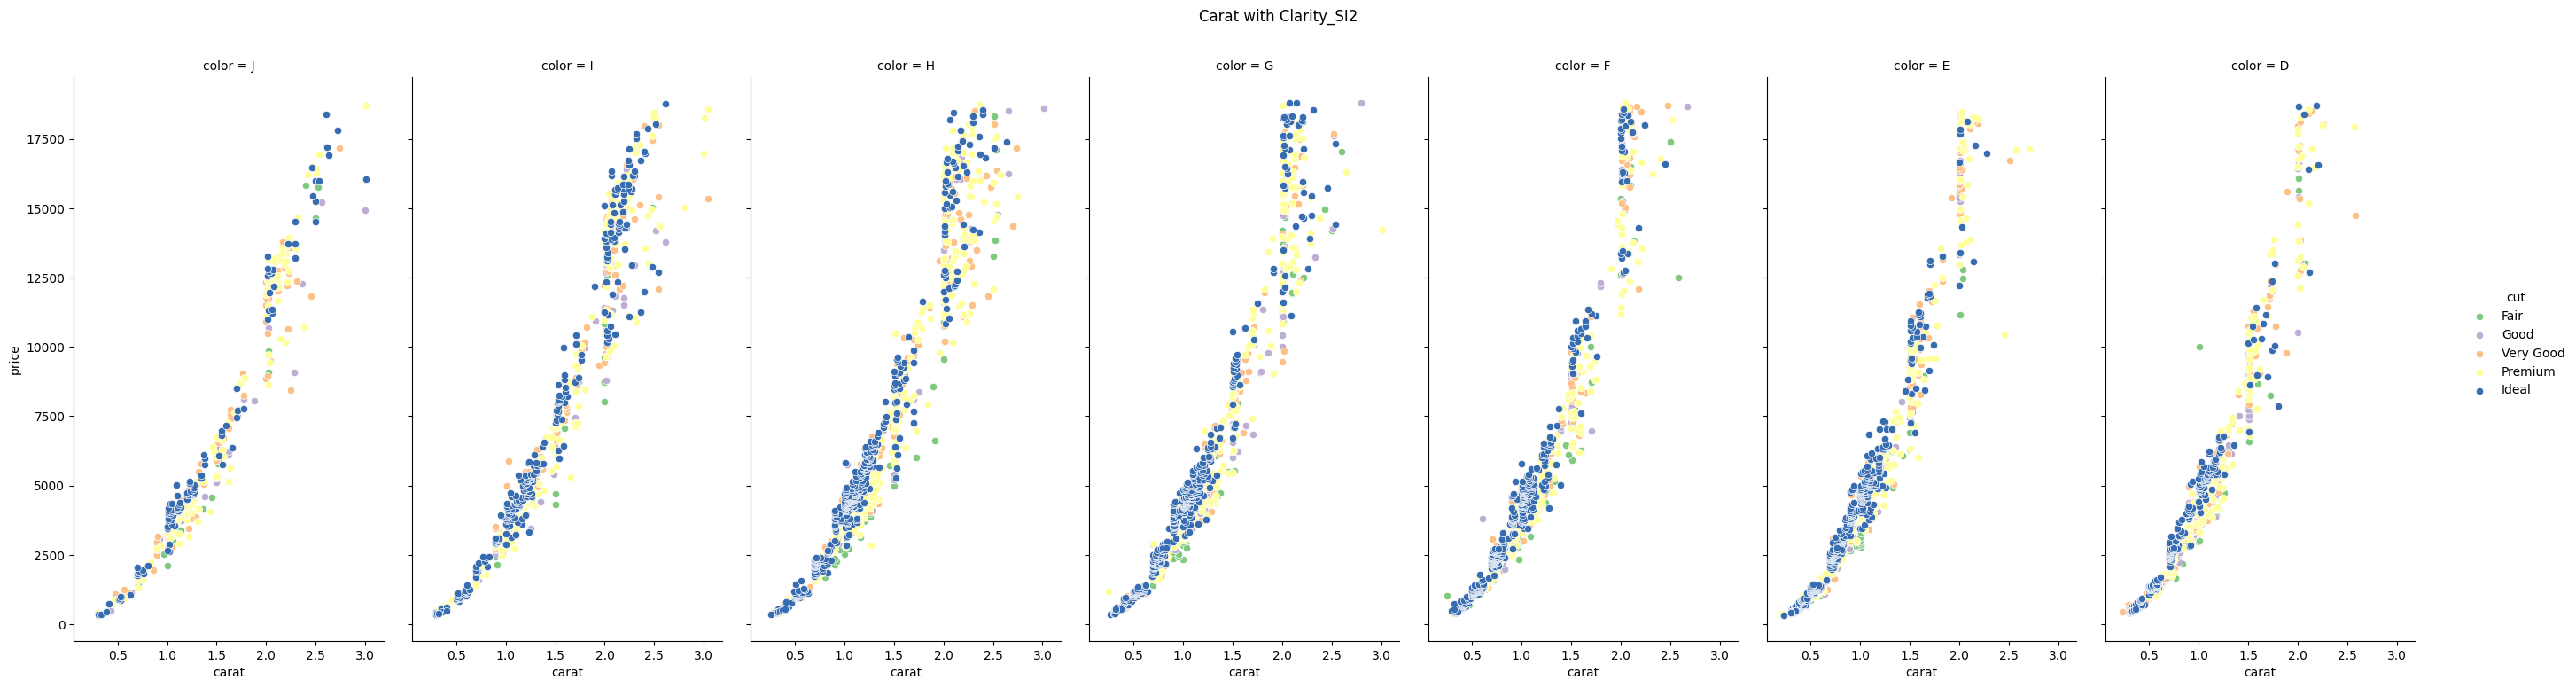

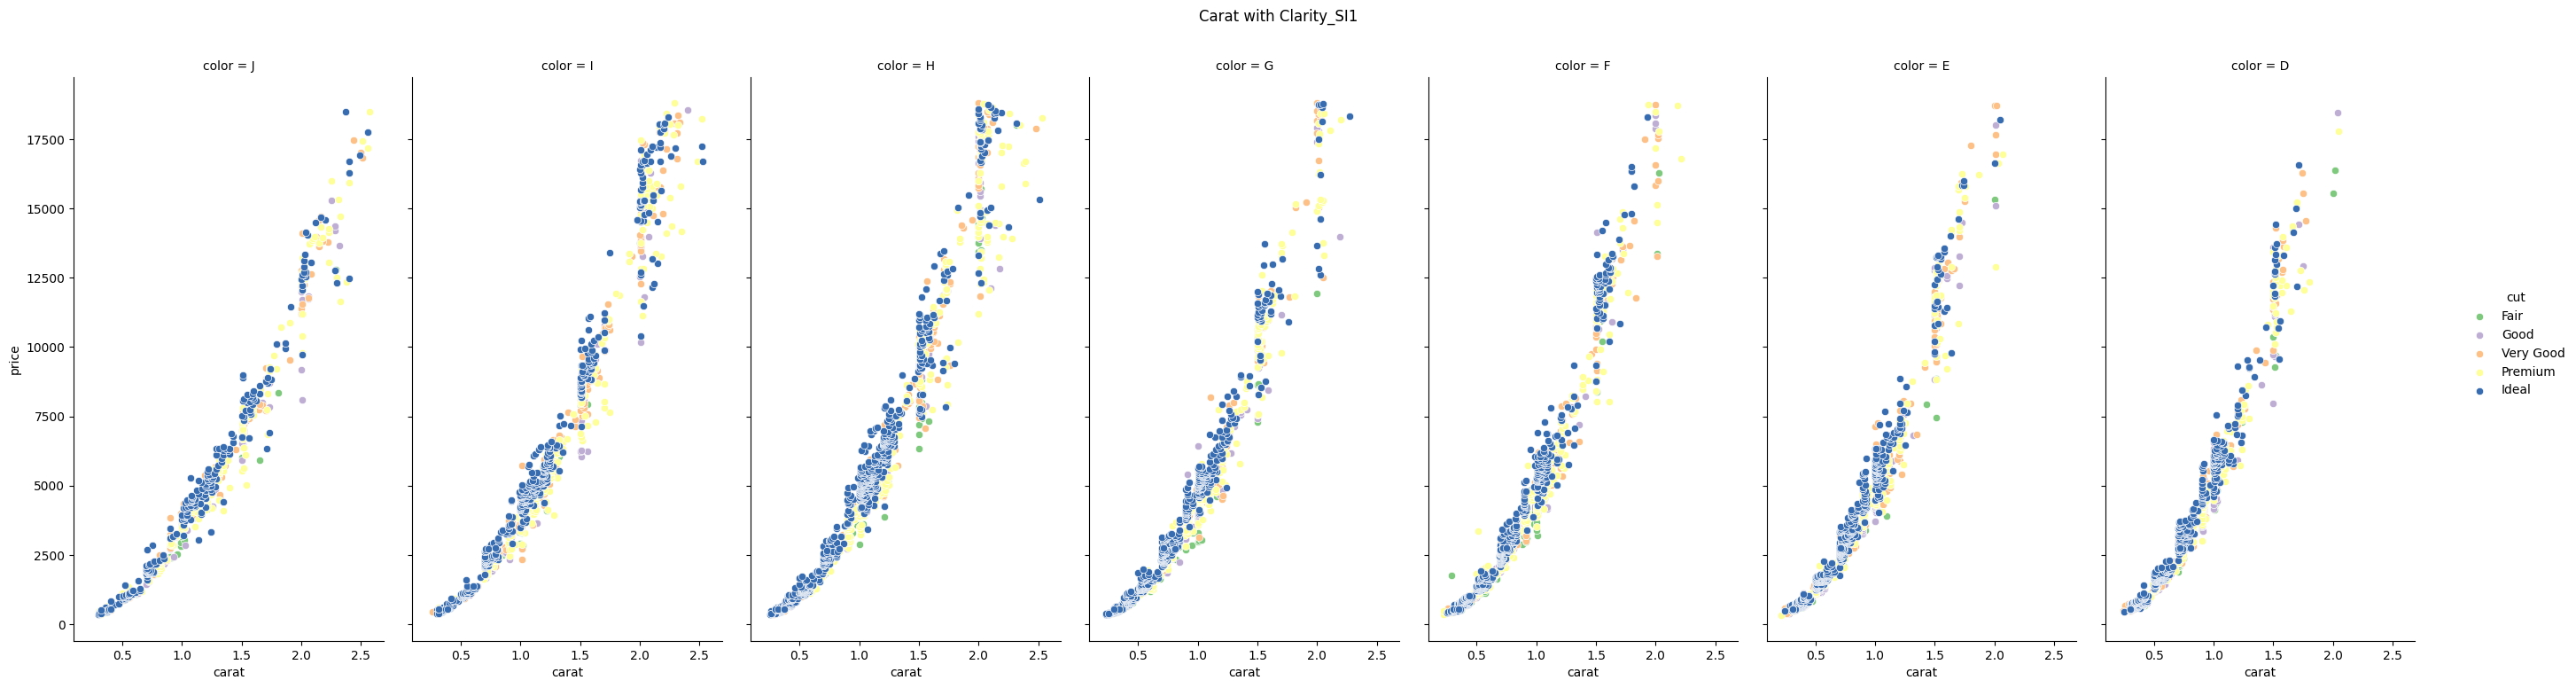

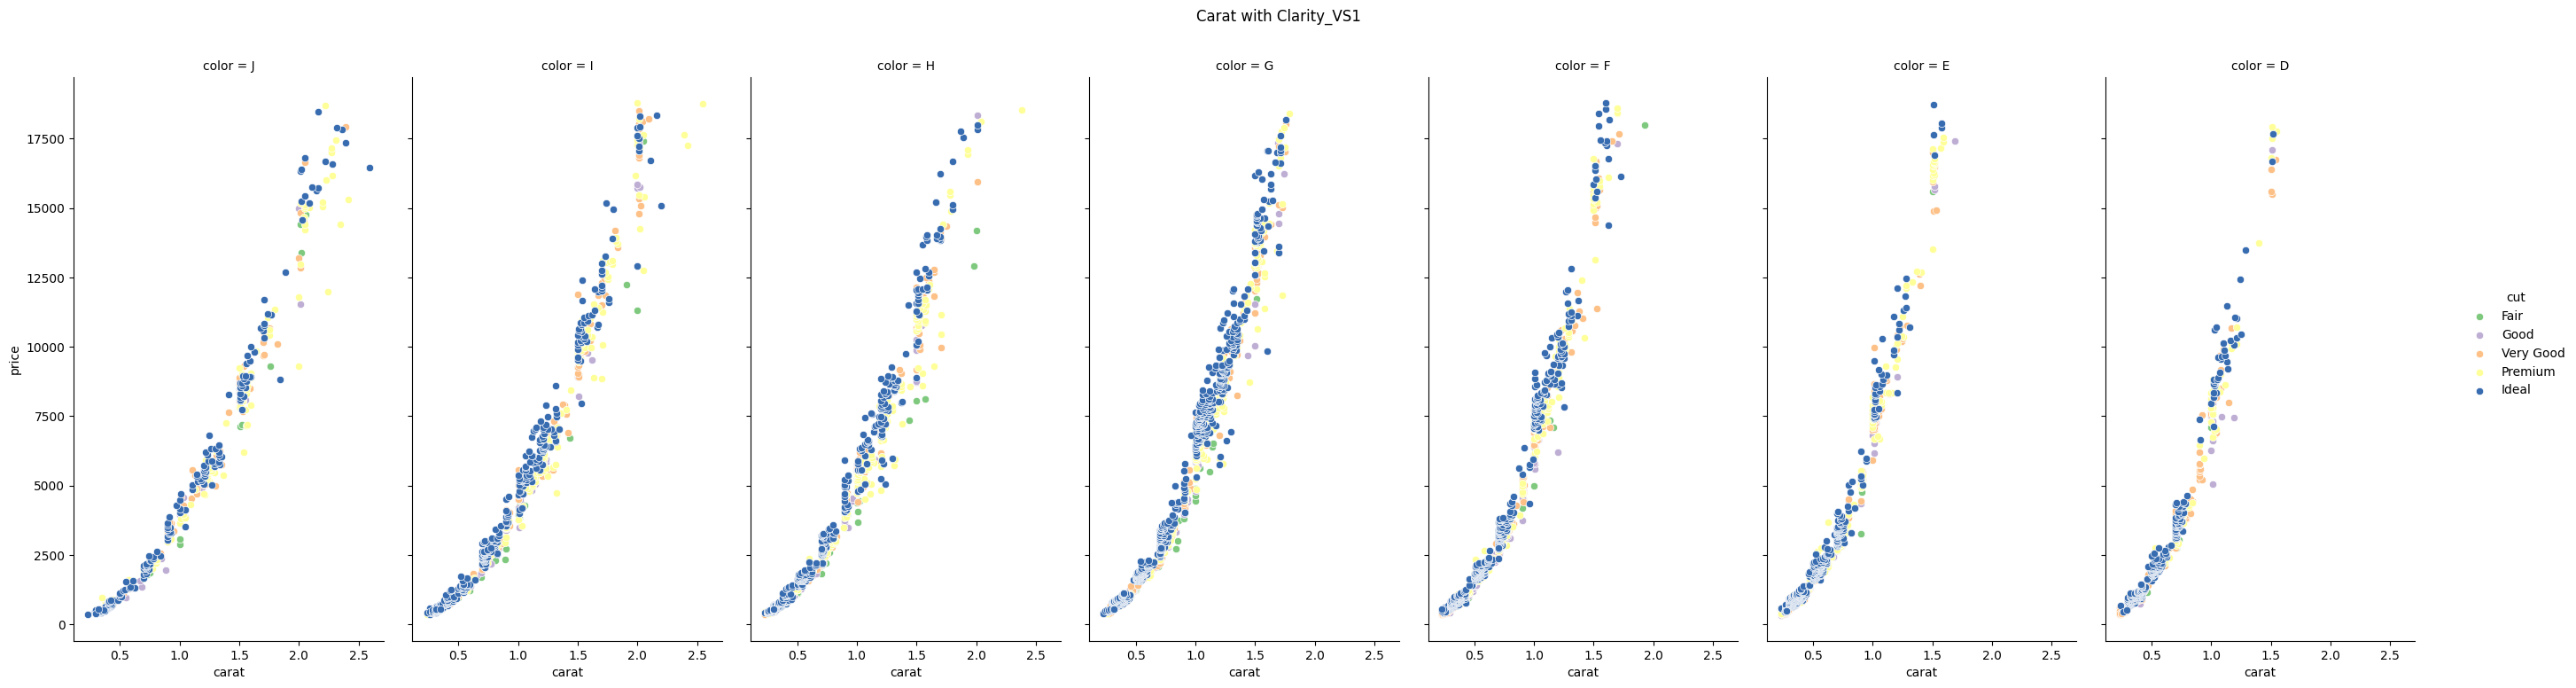

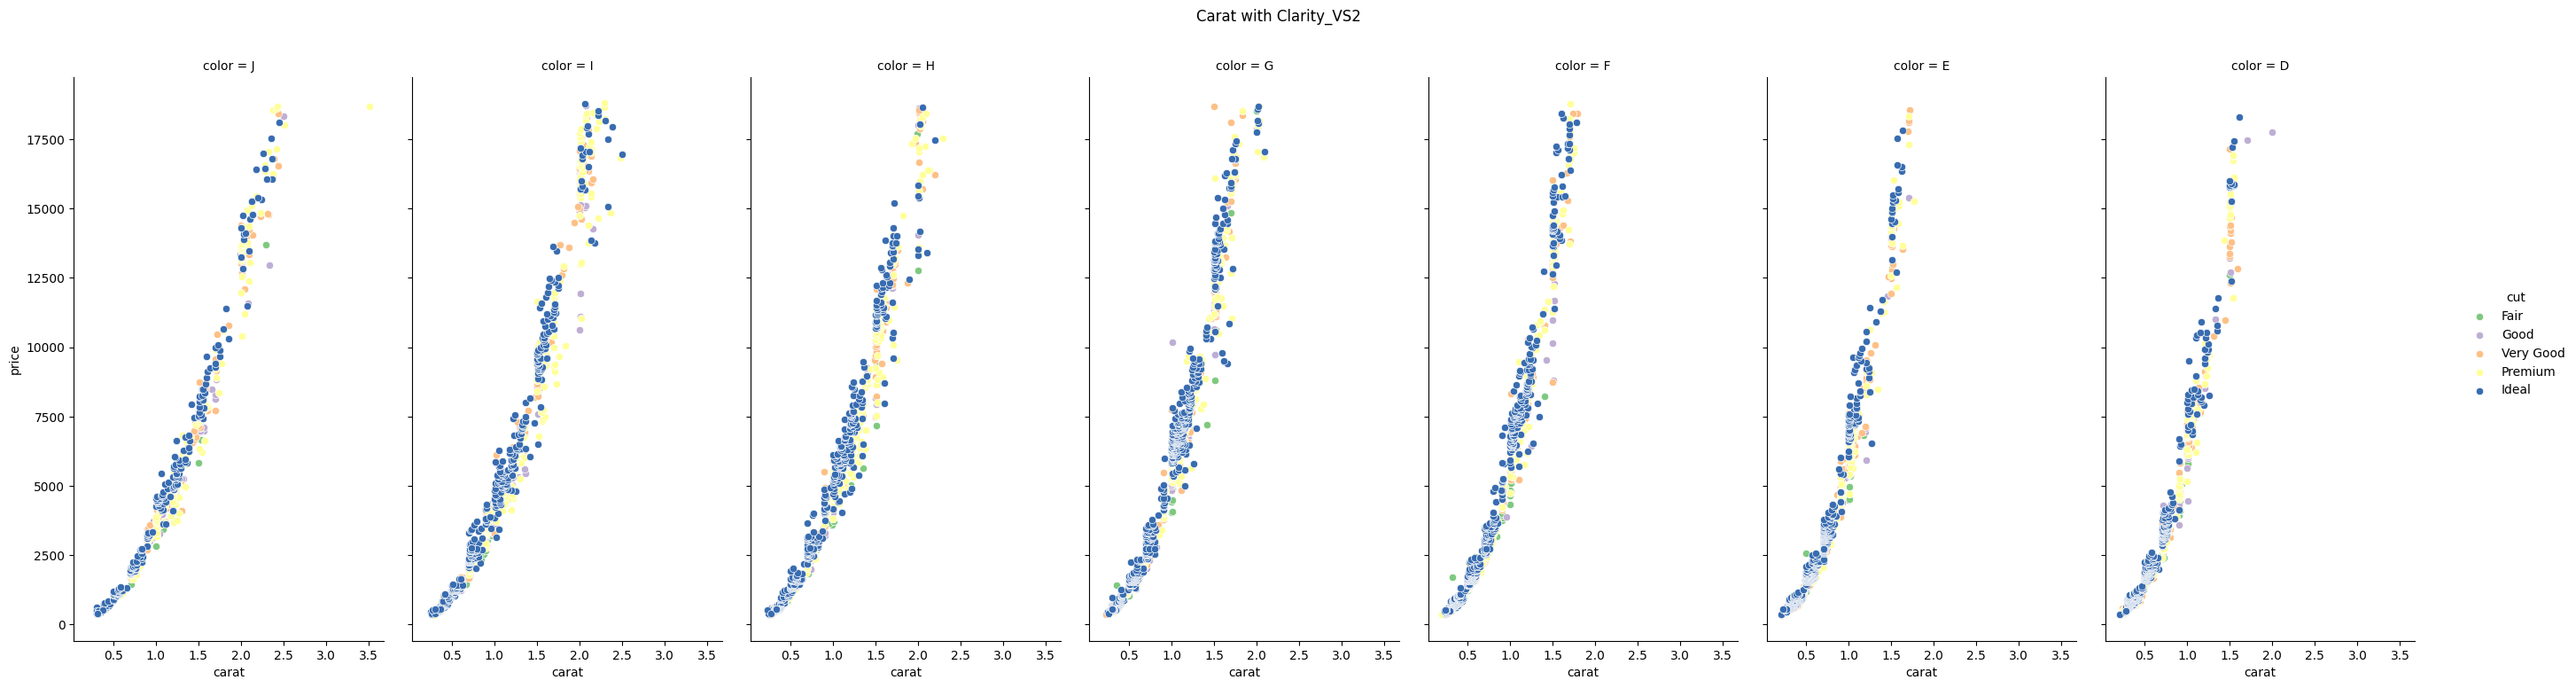

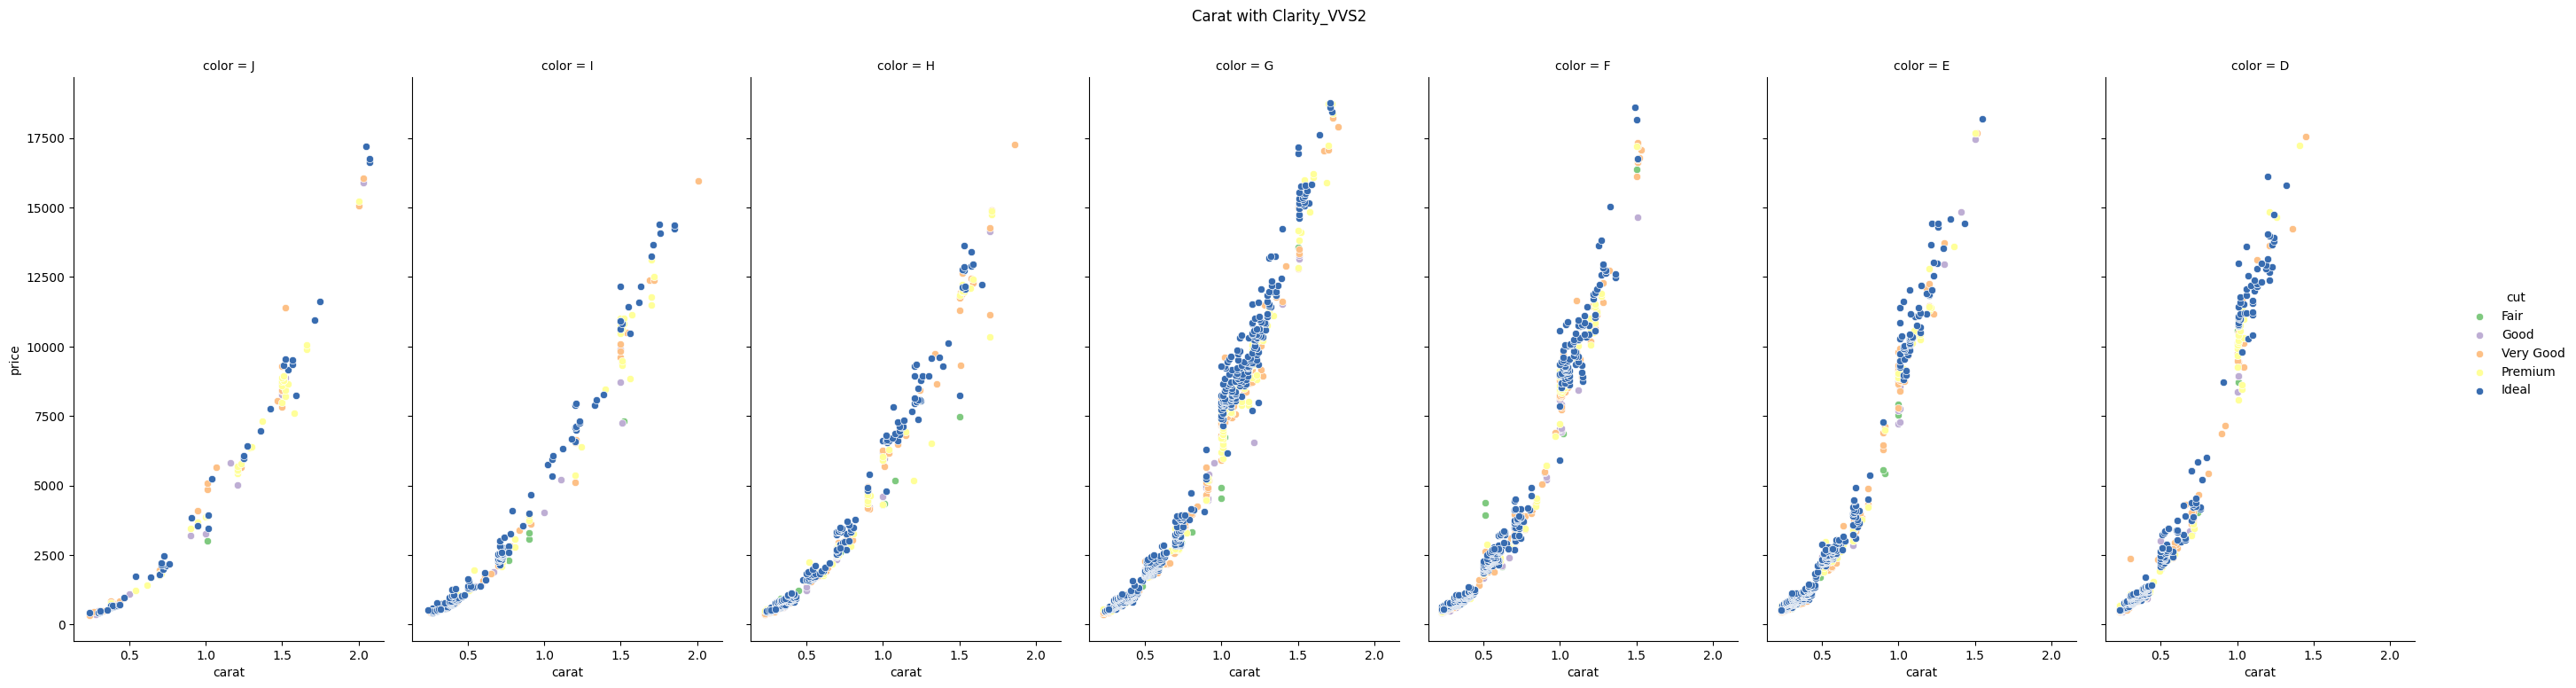

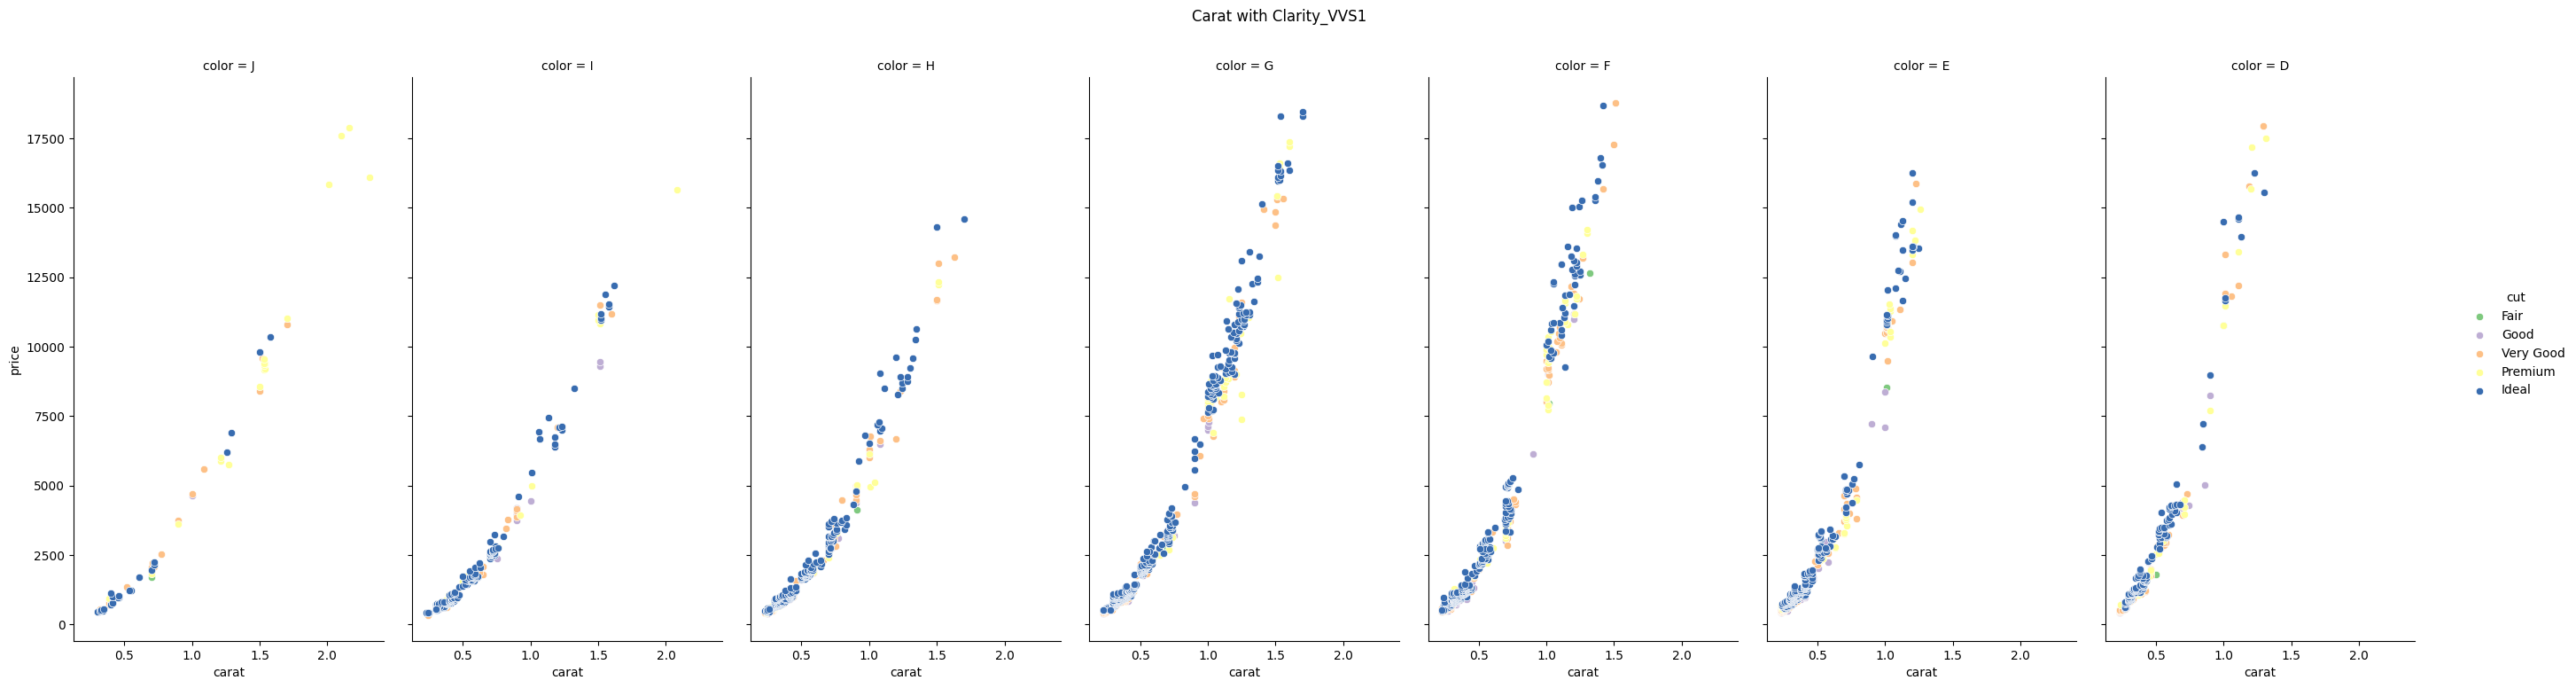

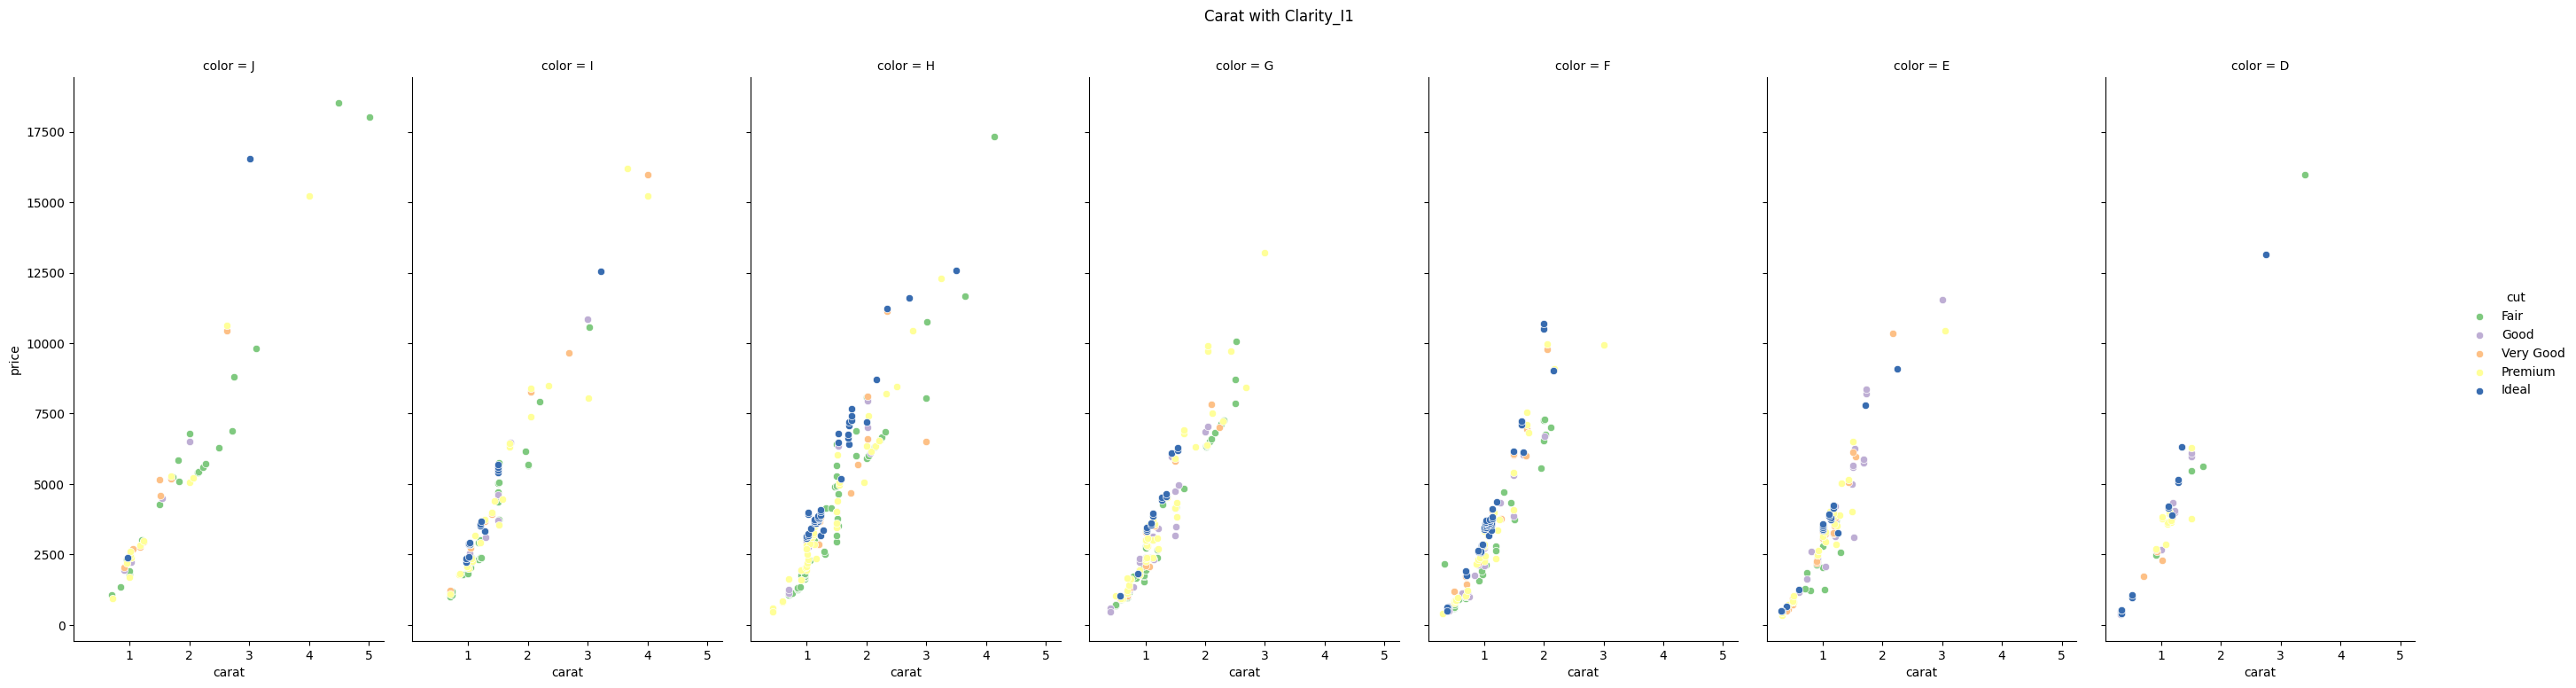

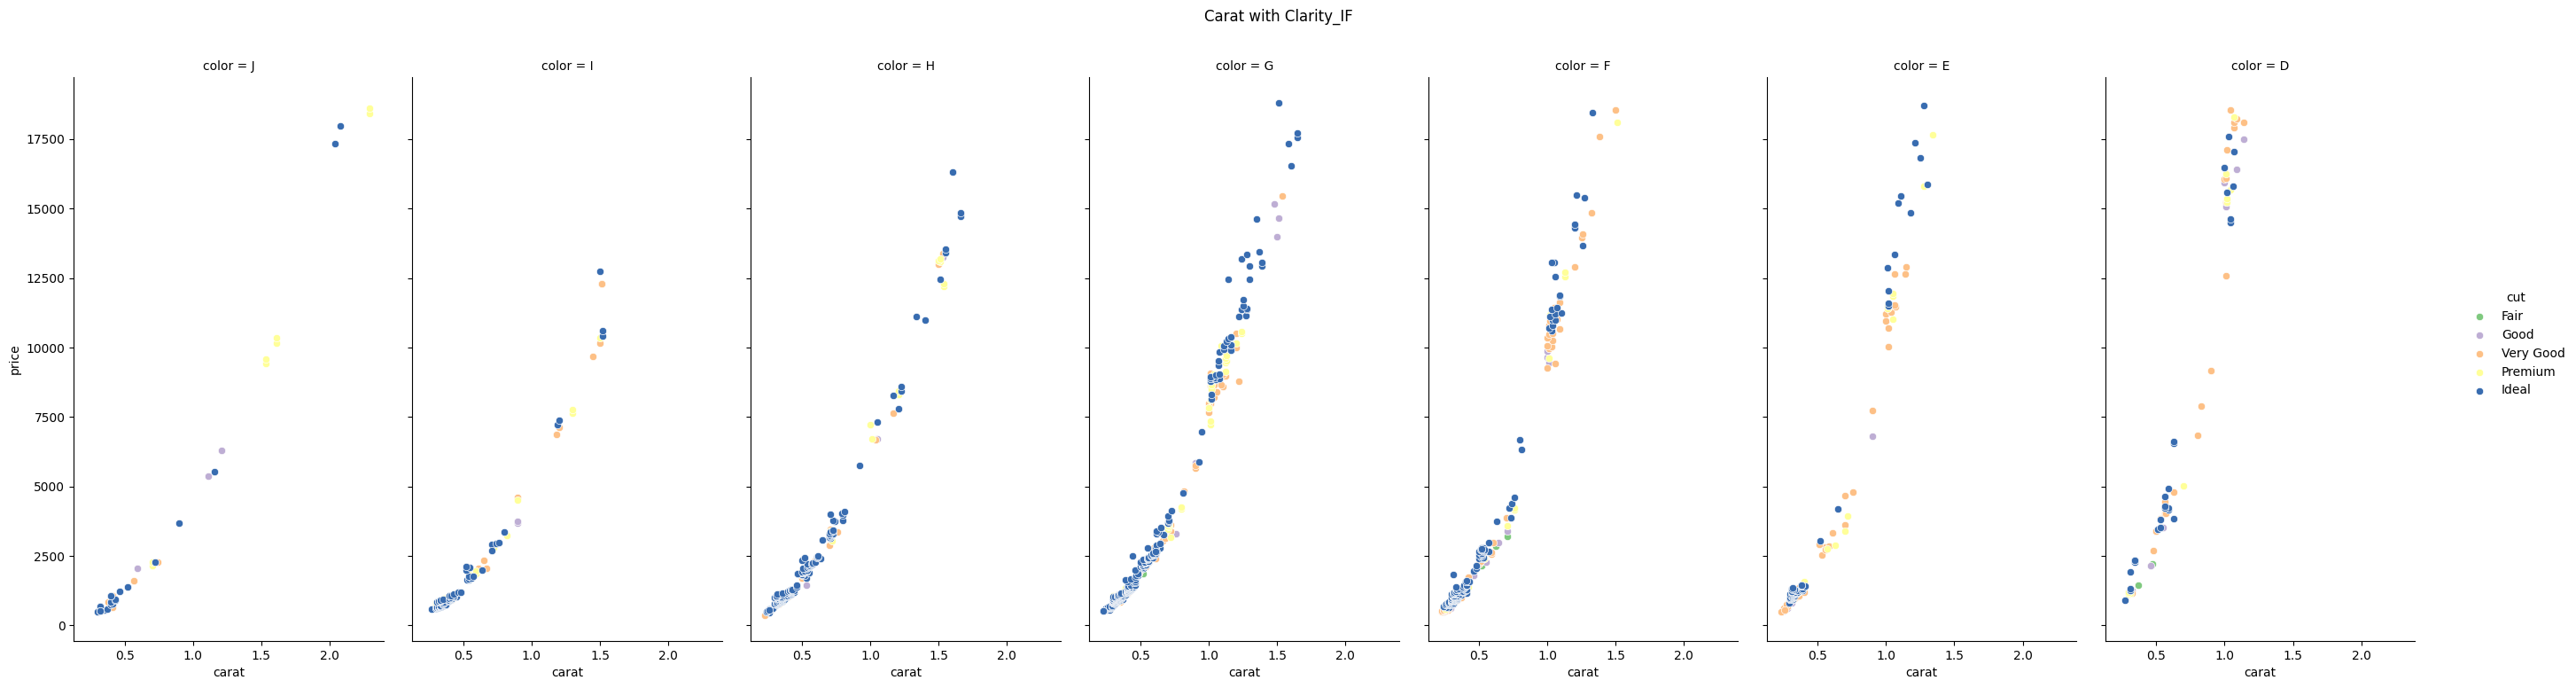

In [642]:
for i in df['clarity'].unique():
    g = sns.FacetGrid(data = df[df['clarity'] == i], 
                  col = 'color', 
                  hue = 'cut',
                  height = 8,
                  aspect = 0.5, 
                  palette = 'Accent')
    g.map(sns.scatterplot, 'carat', 'price')
    g.set_axis_labels('carat', 'price')
    g.fig.suptitle(f'Carat with Clarity_{i}')
    g.add_legend();
    g.tight_layout(pad = 2)

There can be seen a pattern that the slop increases from left to right, so there should be dependence from a 'color', not so sure yet about 'top to bottom' (dependence from 'clarity'). And as for the 'cut', blue values which correspond to Ideal cut seem to be on the top everywhere but the significance is questionable. Also it may seem that dependancy is non-linear (which is strange taking the correlation between 'carat' and 'price' into account).

In [643]:
df['carat_sq'] = df['carat']**2
df

carat        cut color clarity  depth  table  price     x     y     z  \
1       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
2       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
3       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
4       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
5       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

           volume  carat_sq  
1       38.202030    0.0529  
2       34.505856    0.0441  
3       38.076885    0.0529  
4       46.724580    0.0841  
5       51.917250    0.0961  
...           ...       ...  
53936  115.920000    0.5184  
53937  118.110175    0.5184  
53938  114.449728    0.4900  
53939  140.766120    0.7396  
53940  124.568444    0.5625  

[53794 rows x 12 columns]

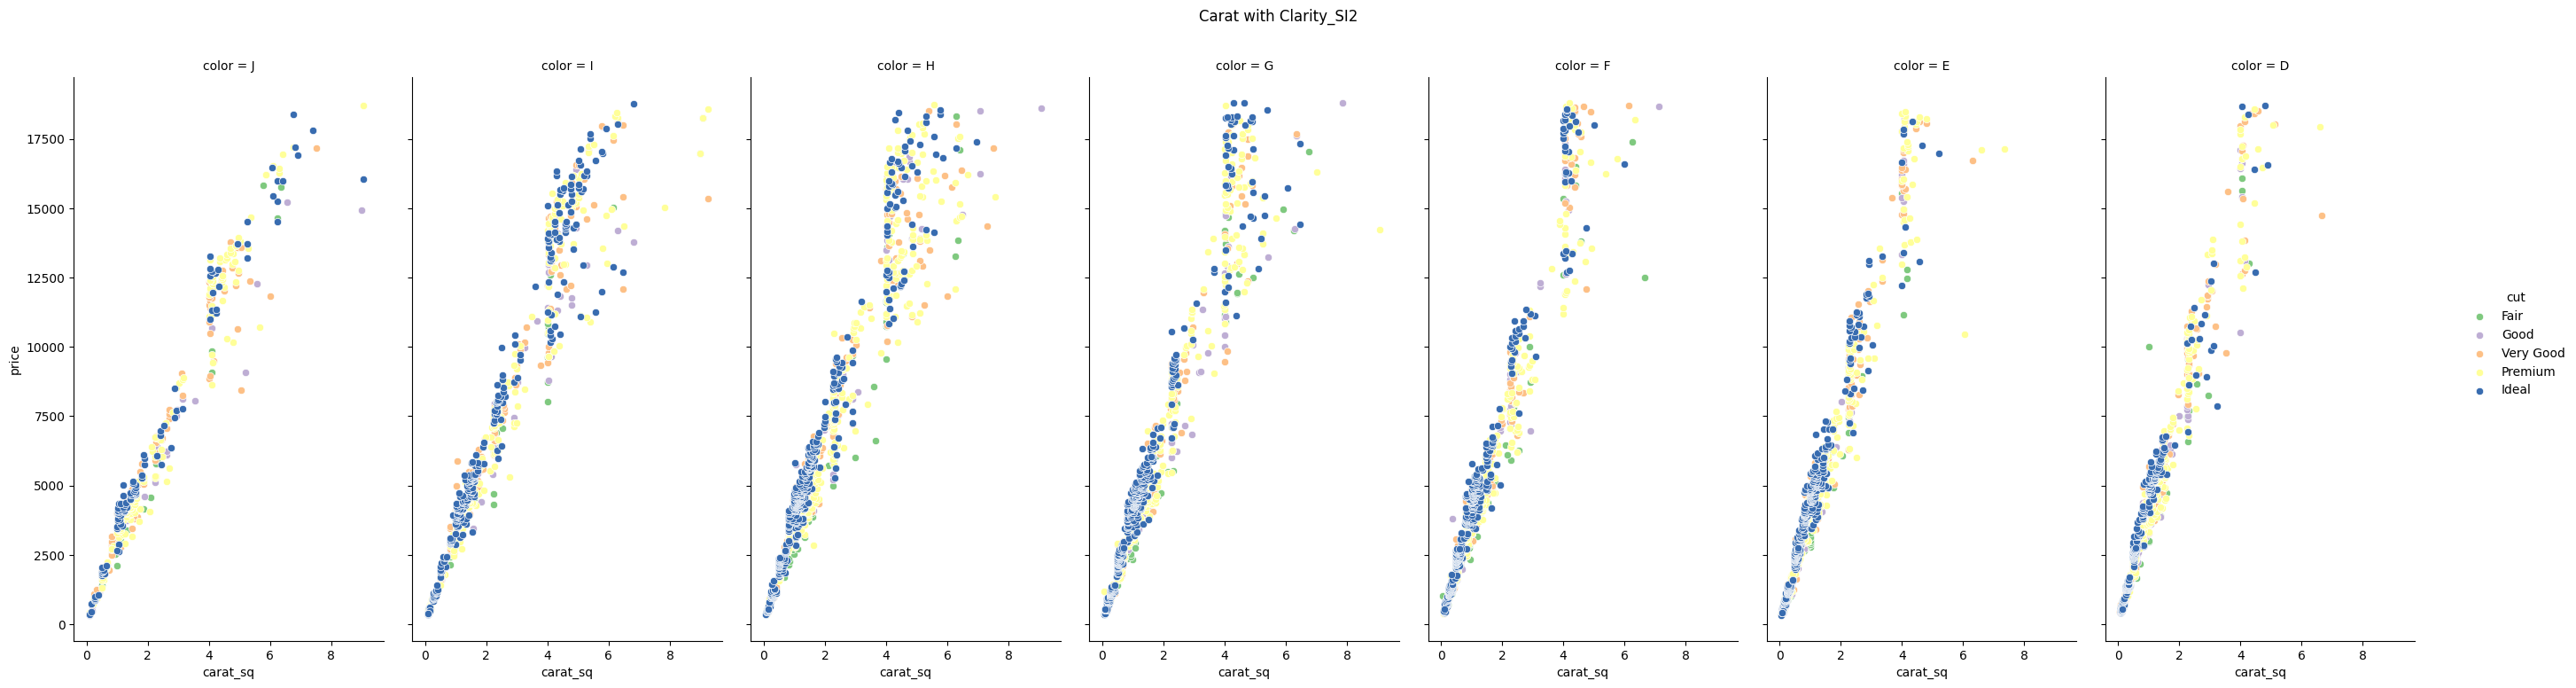

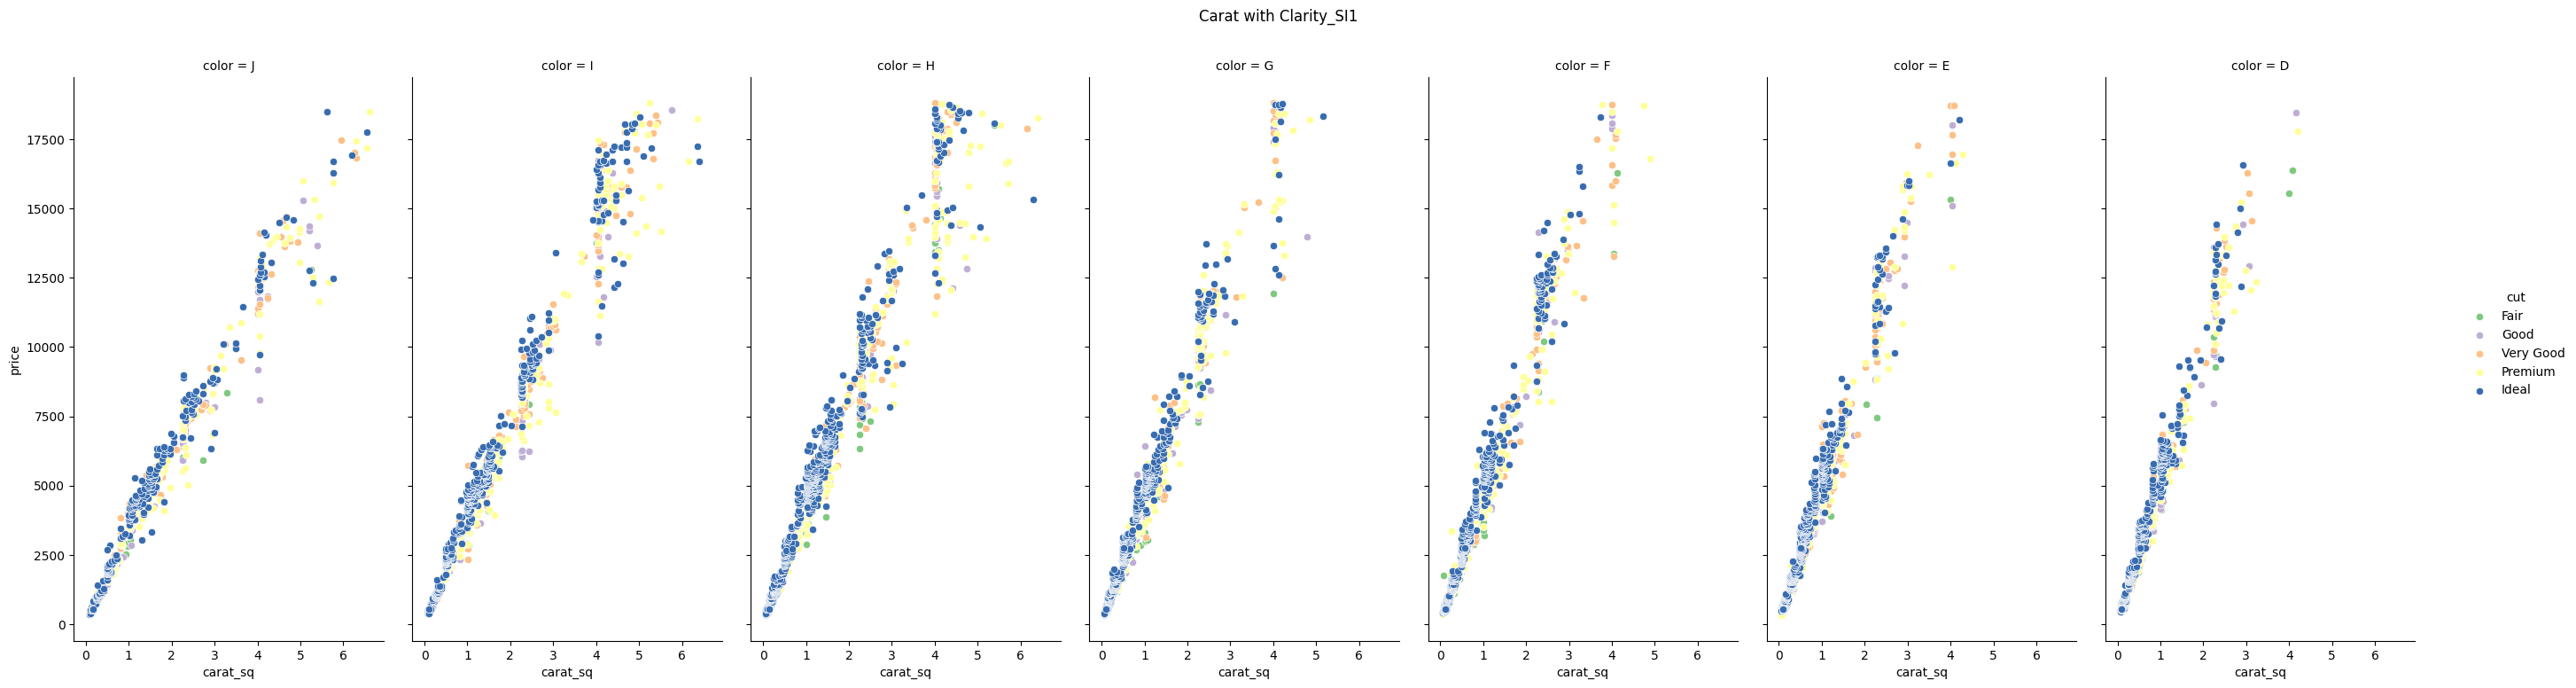

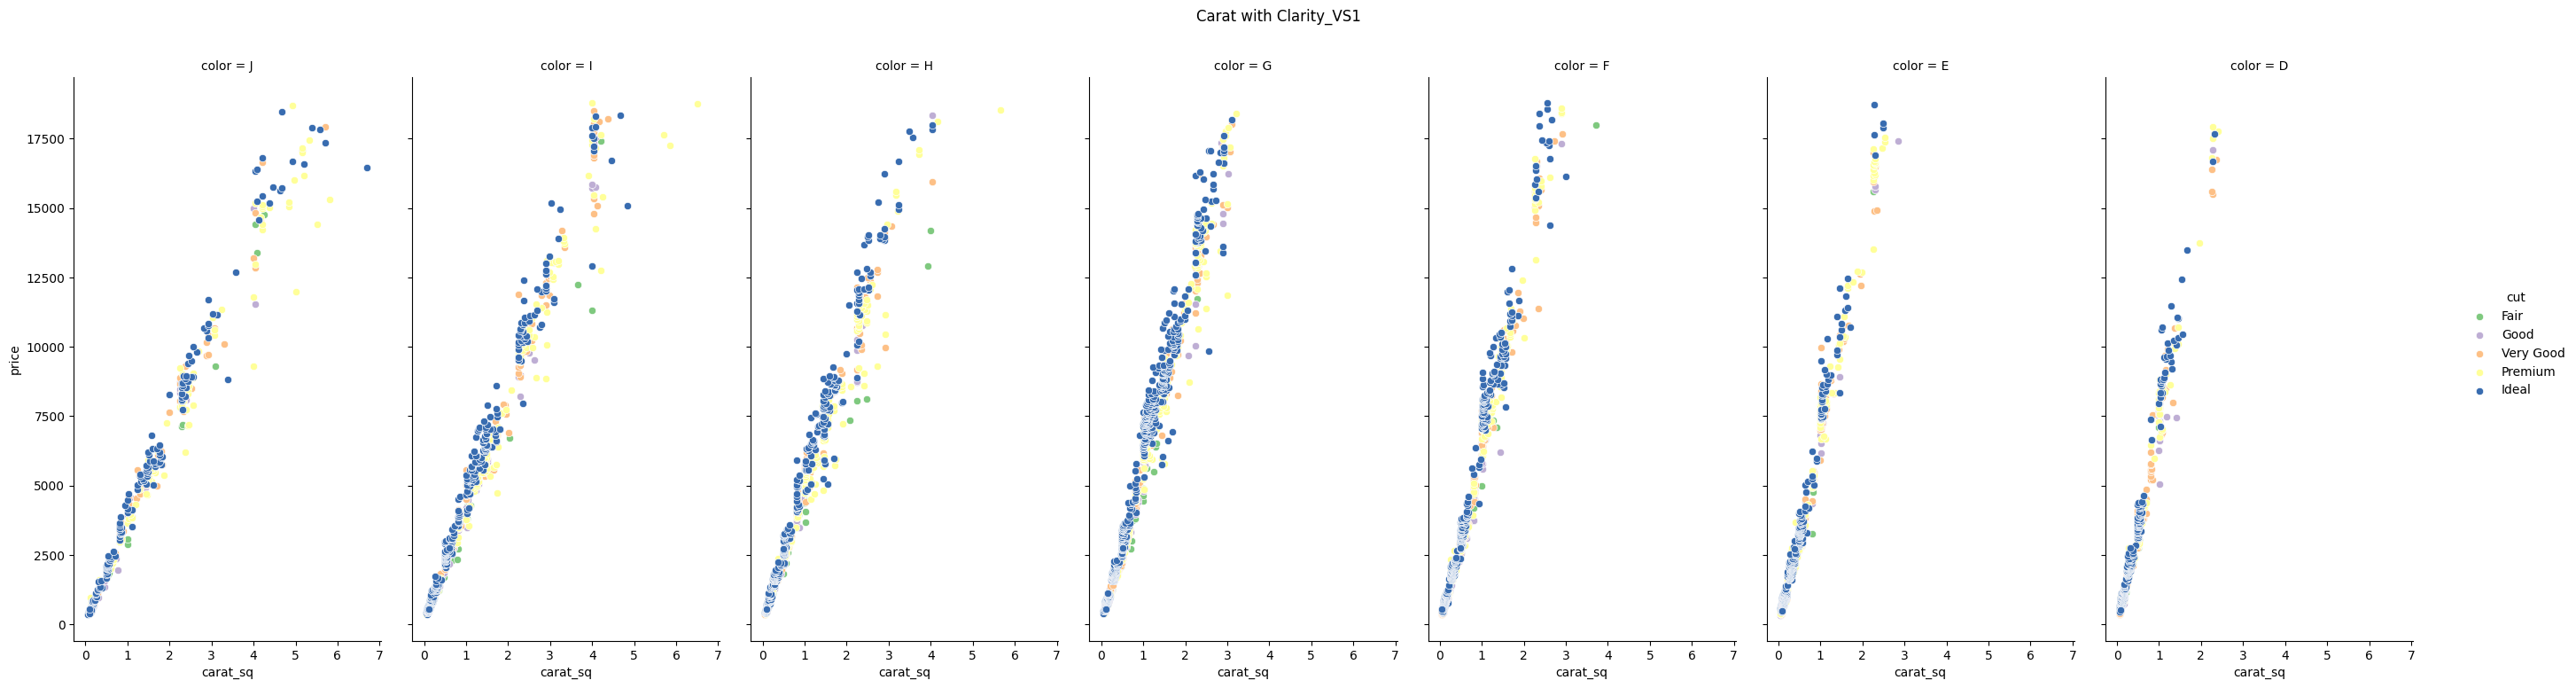

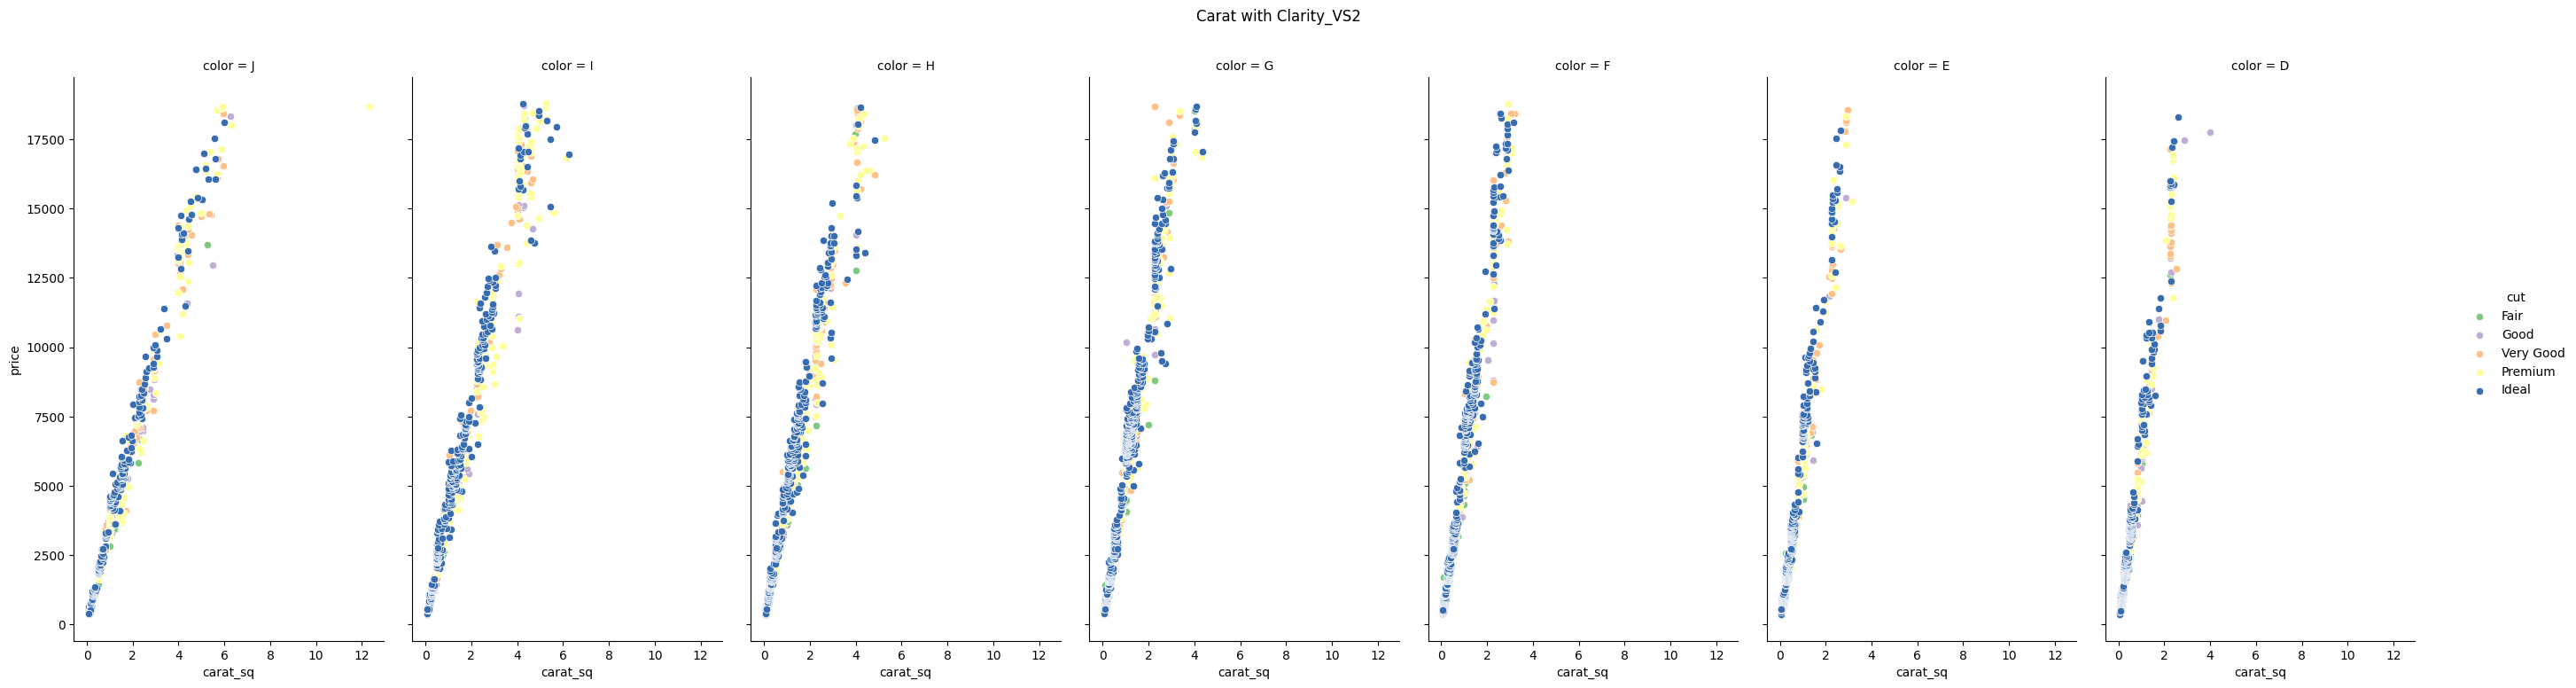

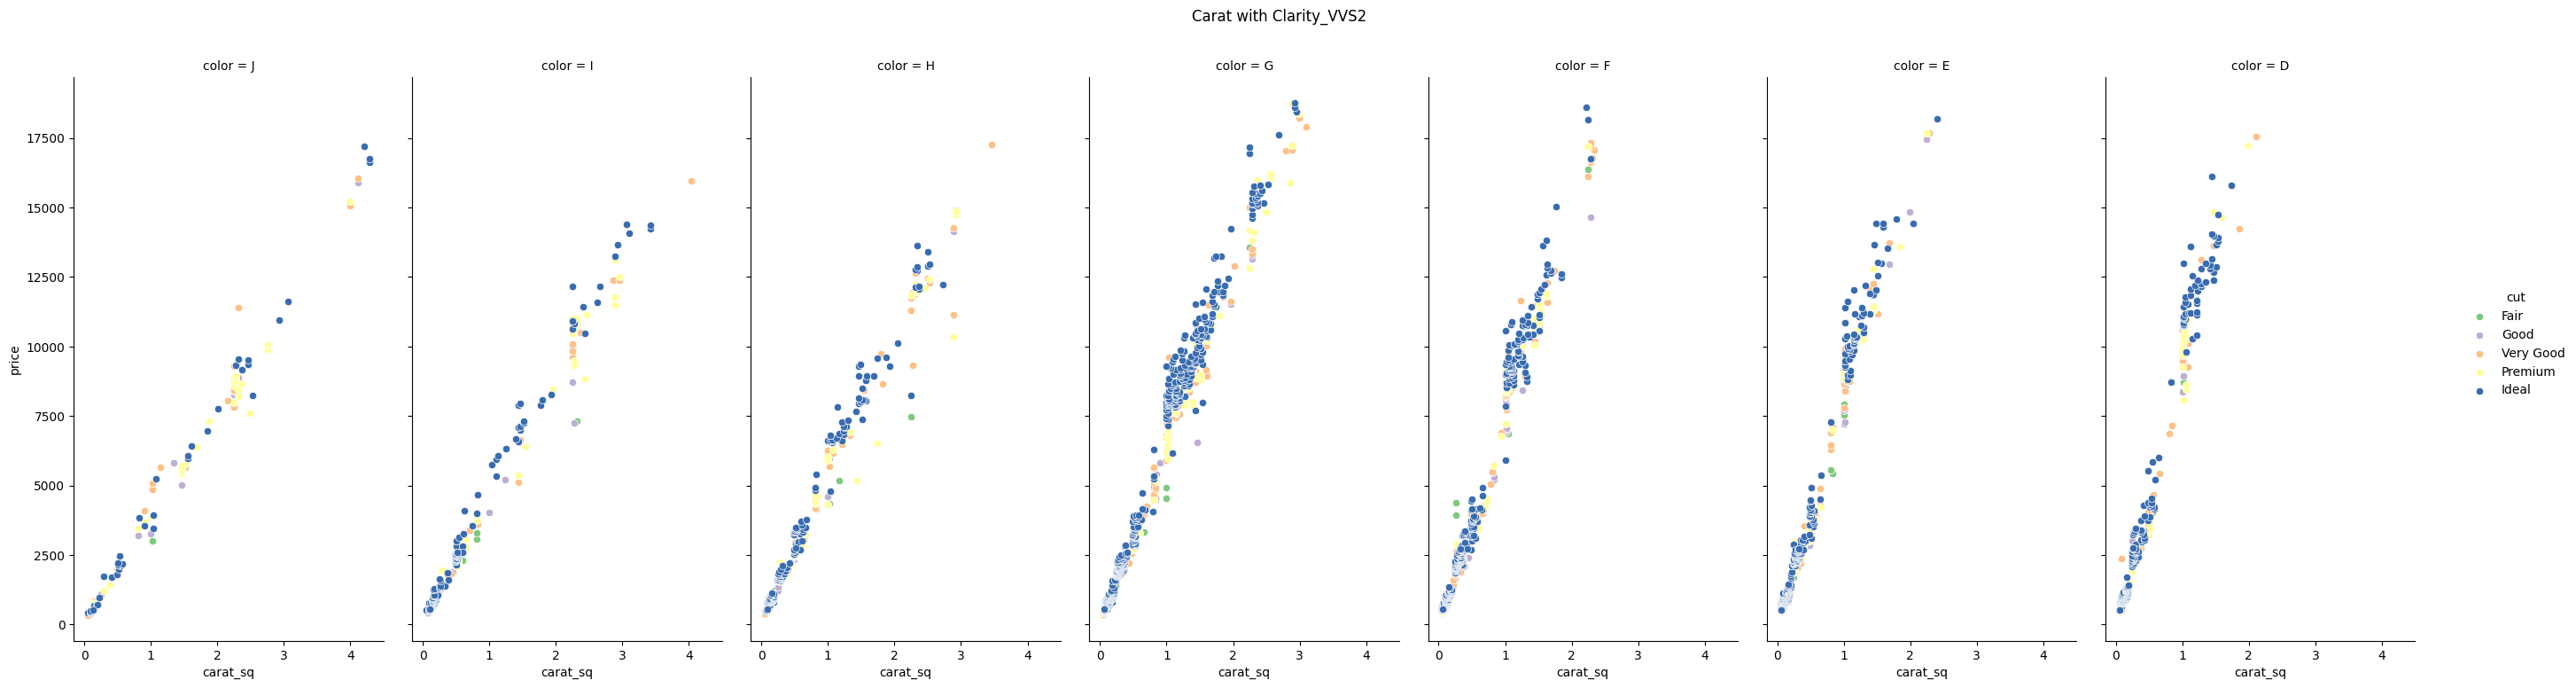

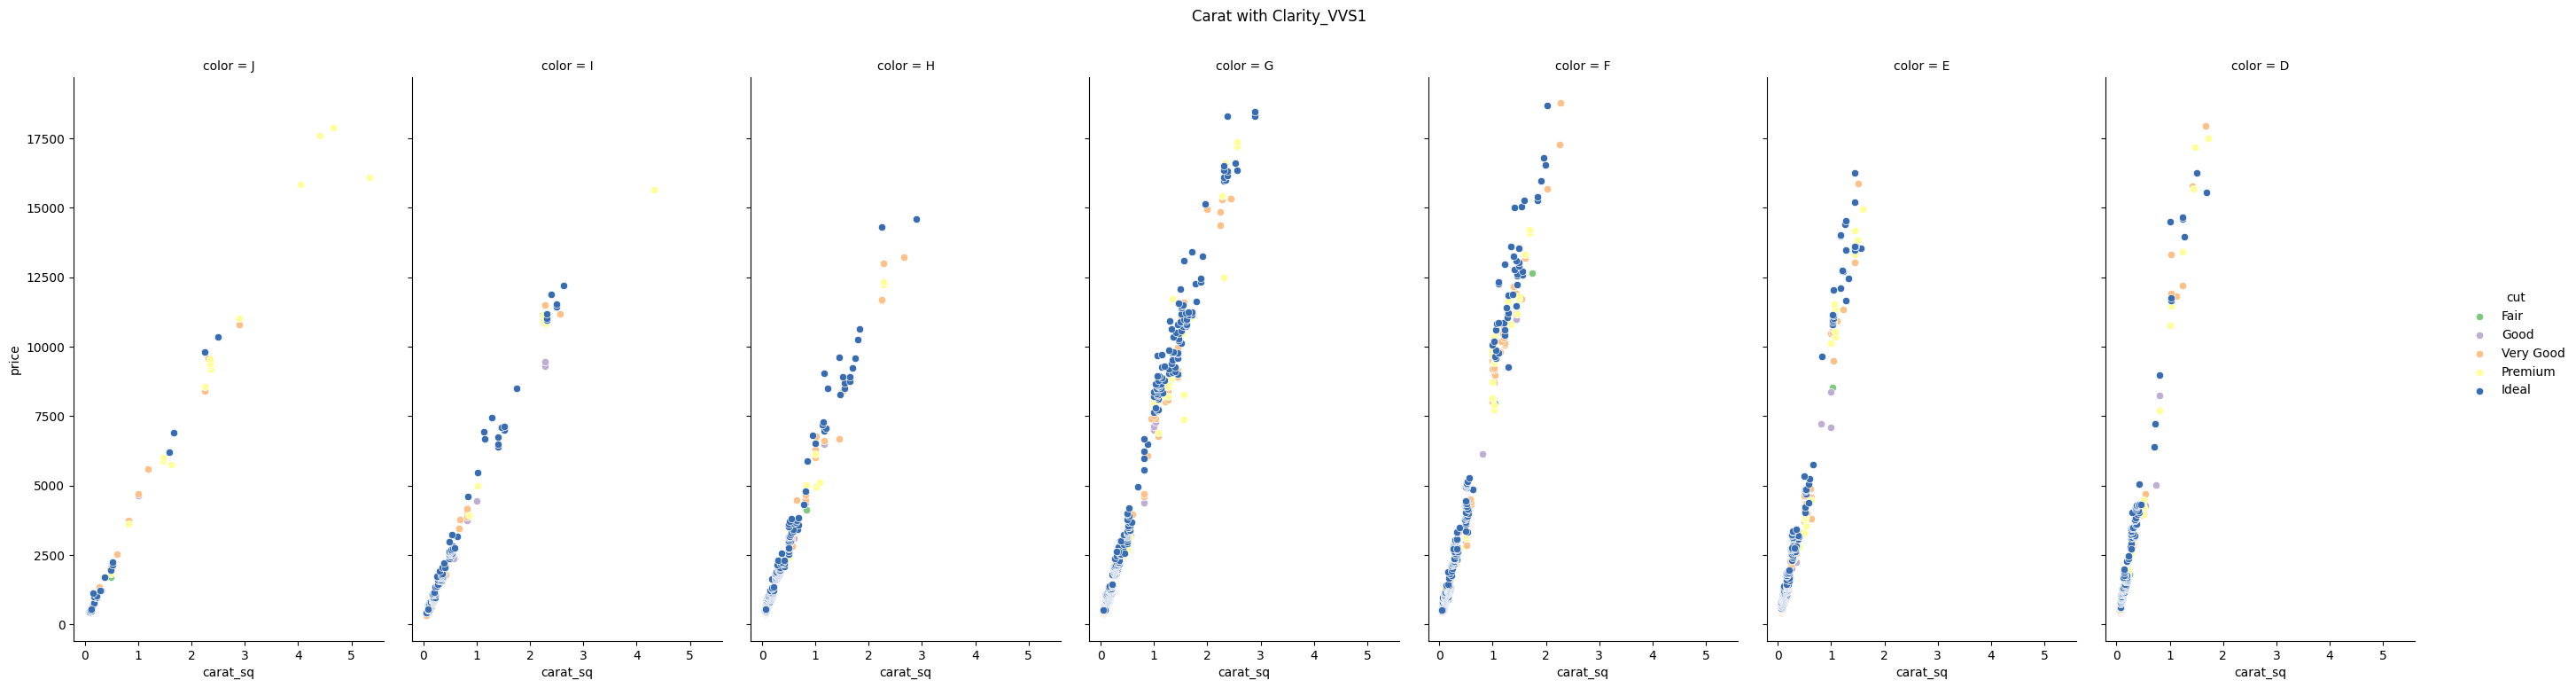

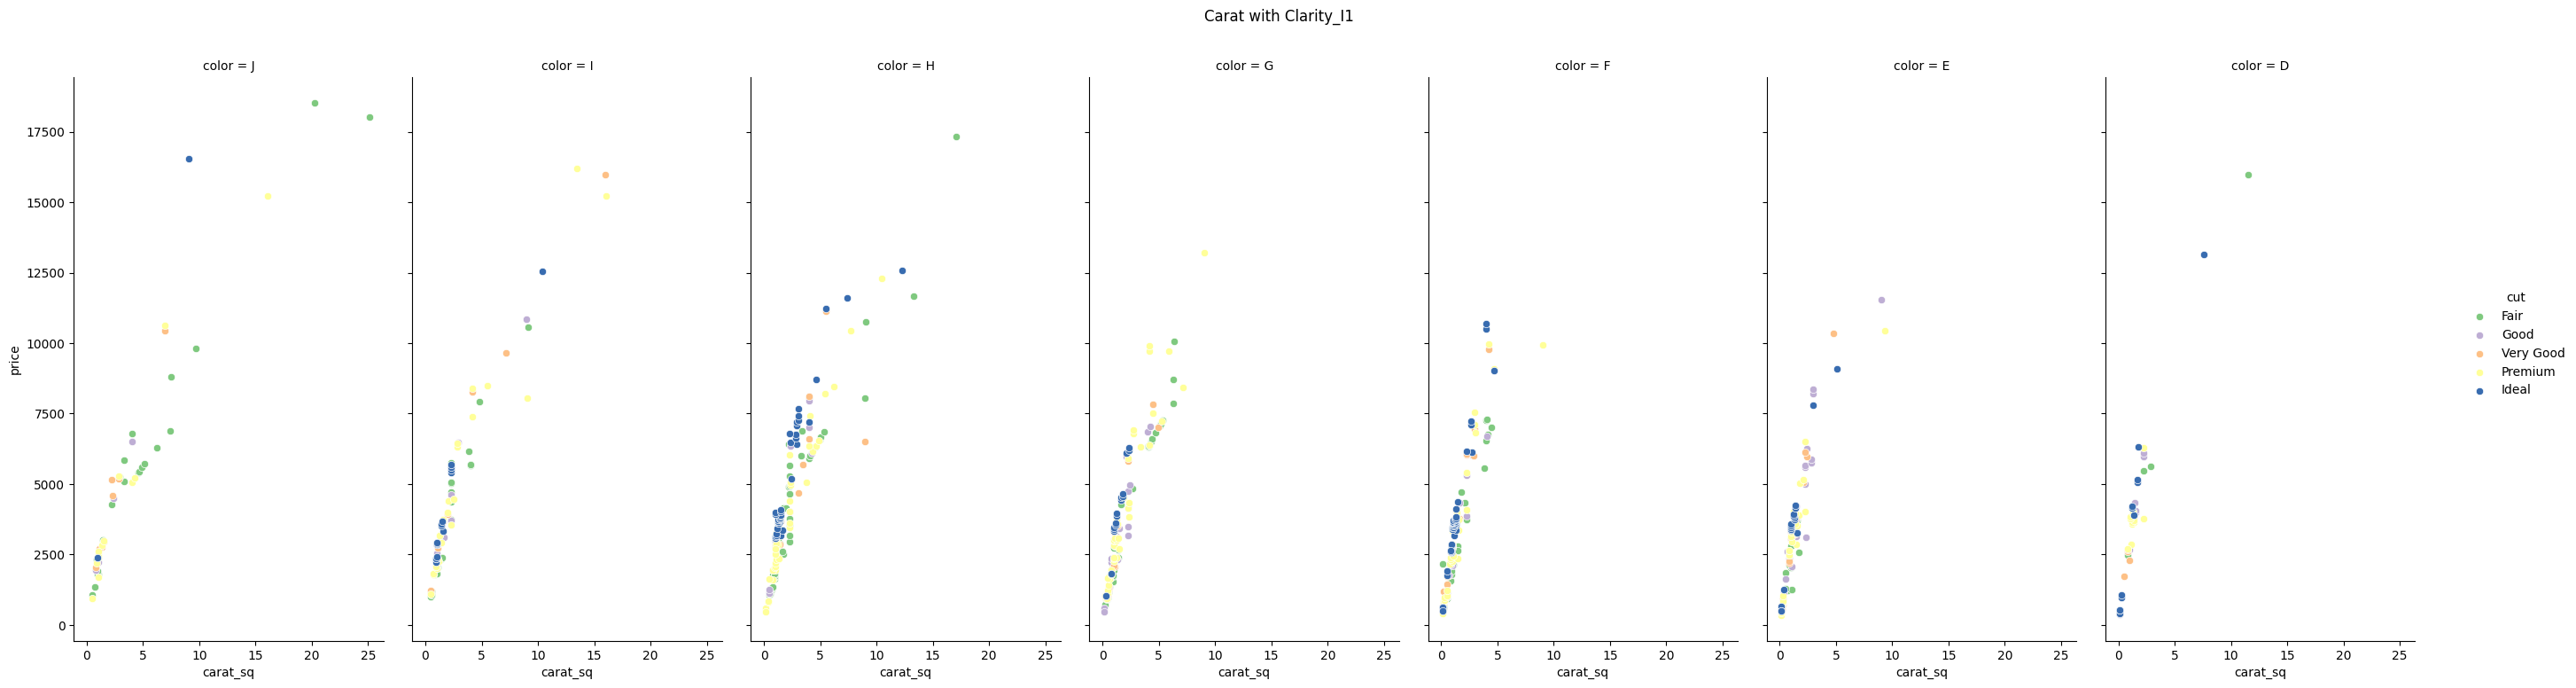

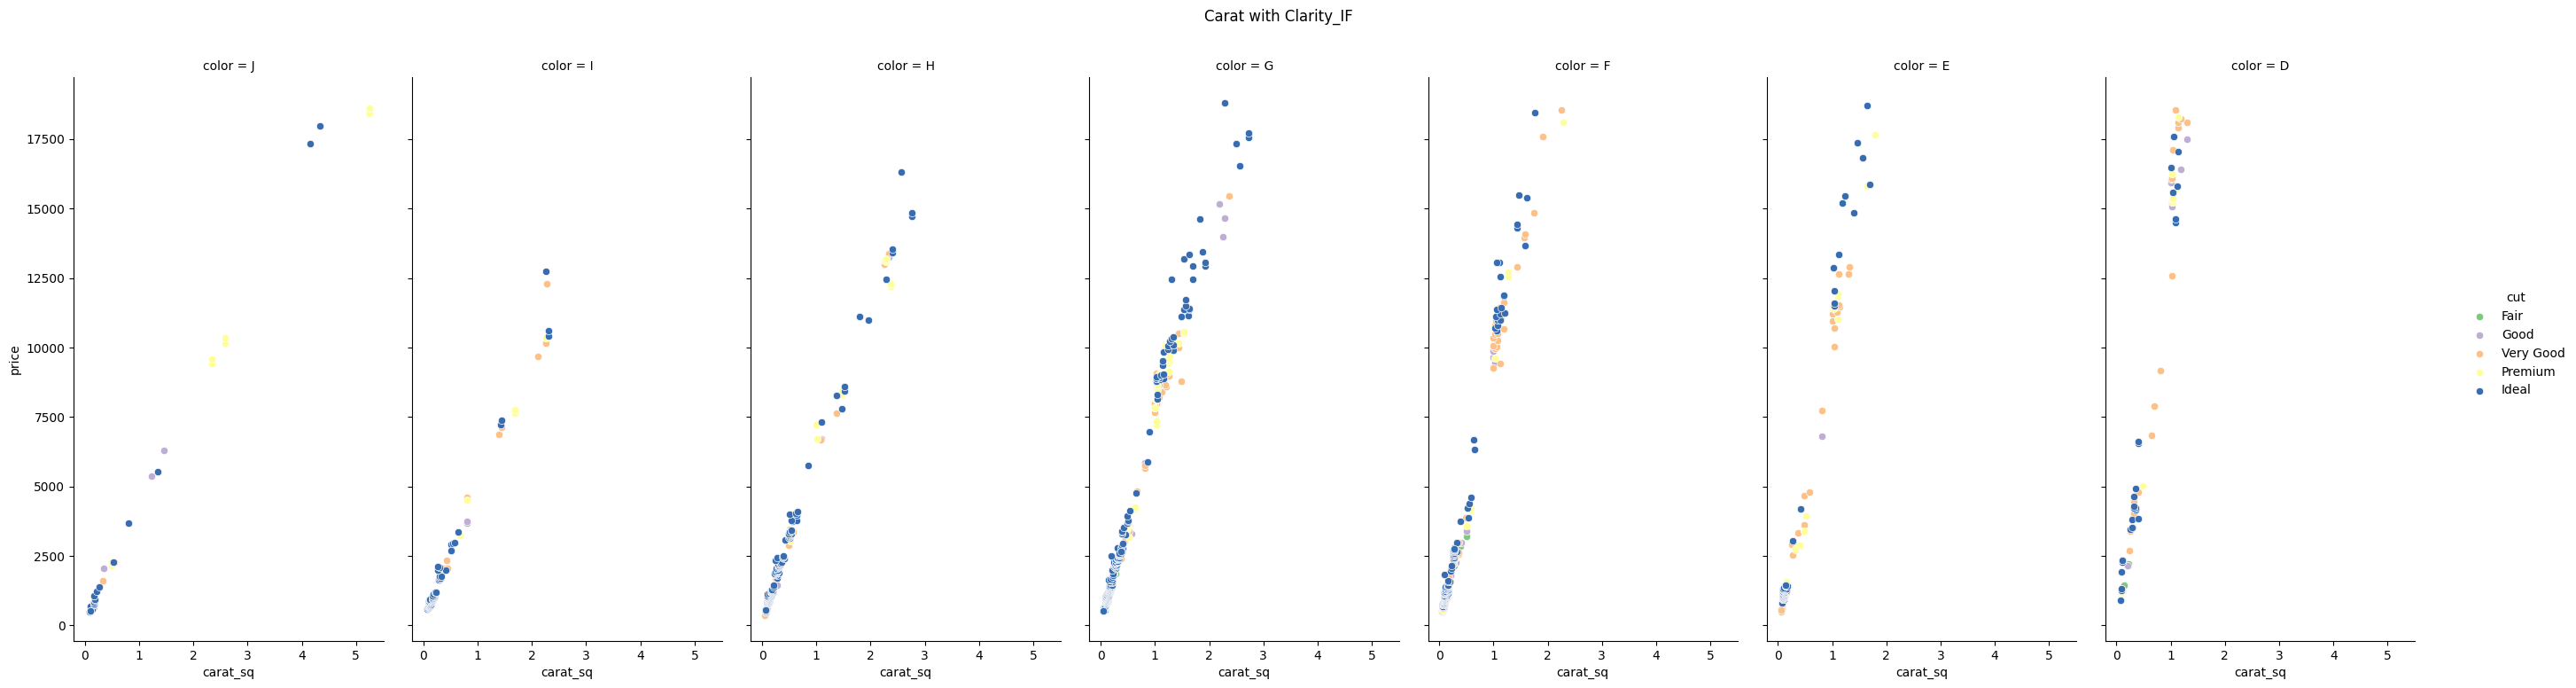

In [644]:
for i in df['clarity'].unique():
    g = sns.FacetGrid(data = df[df['clarity'] == i], 
                  col = 'color', 
                  hue = 'cut',
                  height = 8,
                  aspect = 0.5, 
                  palette = 'Accent')
    g.map(sns.scatterplot, 'carat_sq', 'price')
    g.set_axis_labels('carat_sq', 'price')
    g.fig.suptitle(f'Carat with Clarity_{i}')
    g.add_legend();
    g.tight_layout(pad = 2)

Now the dependancy seems more linear. Let's check the heatmap again.

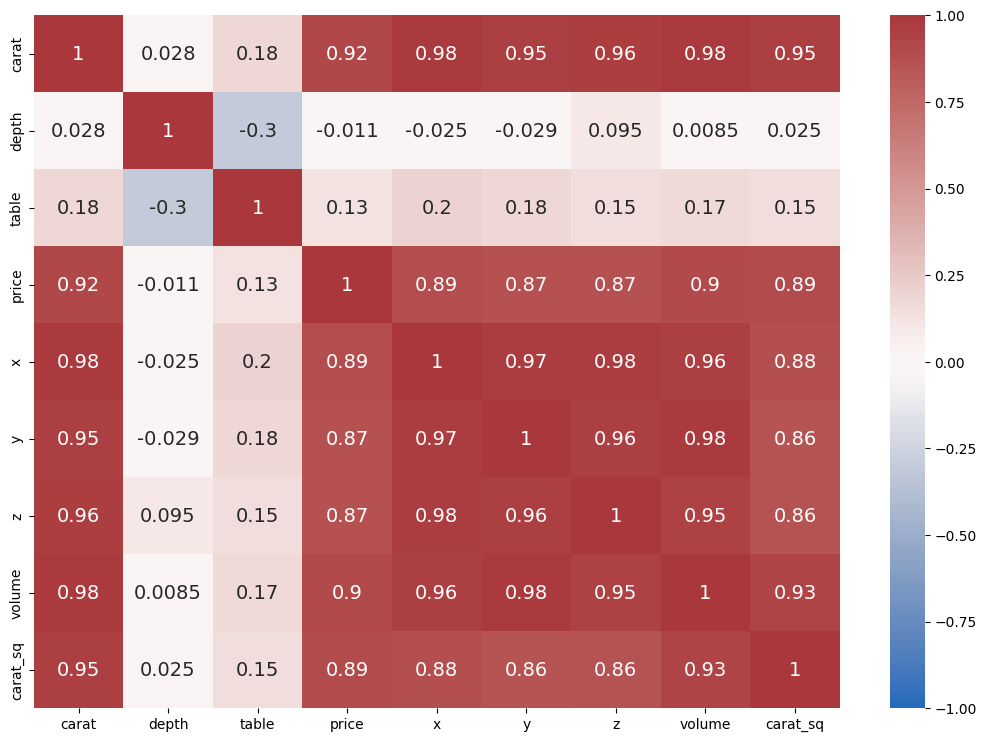

In [645]:
corr = df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize = (13,9))
sns.heatmap(corr, 
            annot = True,                 
            annot_kws = {'fontsize':14},  
            cmap = 'vlag',                
            vmin = -1, vmax = 1);          

Interestingly enough 'carat' still has higher correlation with 'price'. Will keep them both for now.

Let's take a look at clarity vs color

<Figure size 800x800 with 0 Axes>

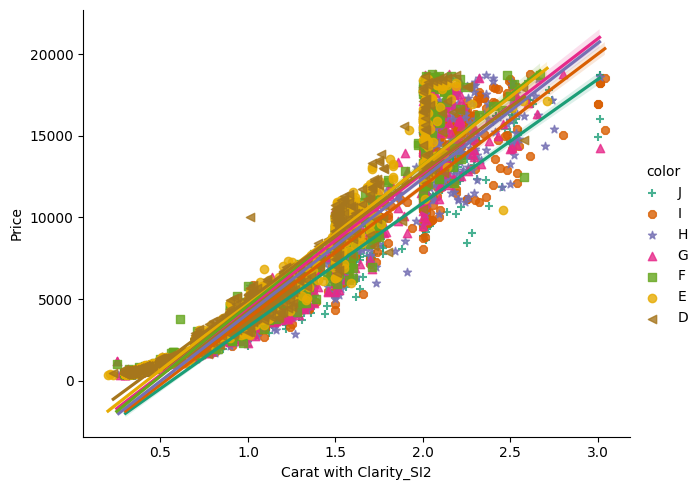

<Figure size 800x800 with 0 Axes>

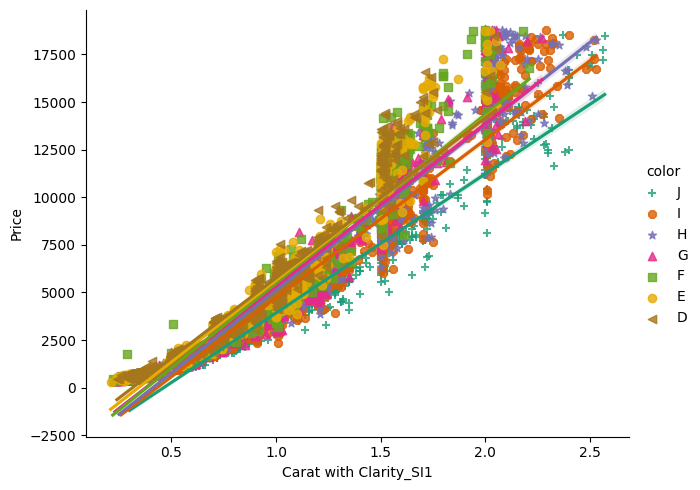

<Figure size 800x800 with 0 Axes>

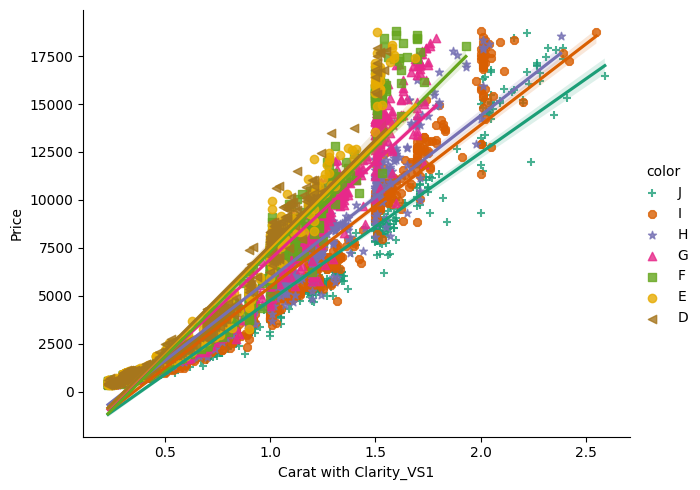

<Figure size 800x800 with 0 Axes>

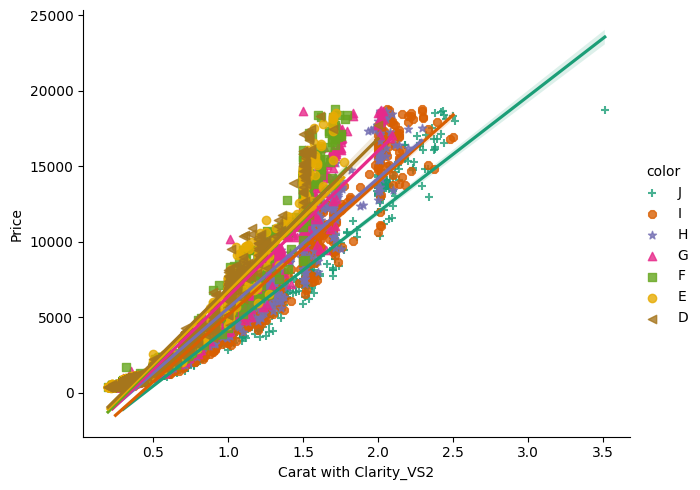

<Figure size 800x800 with 0 Axes>

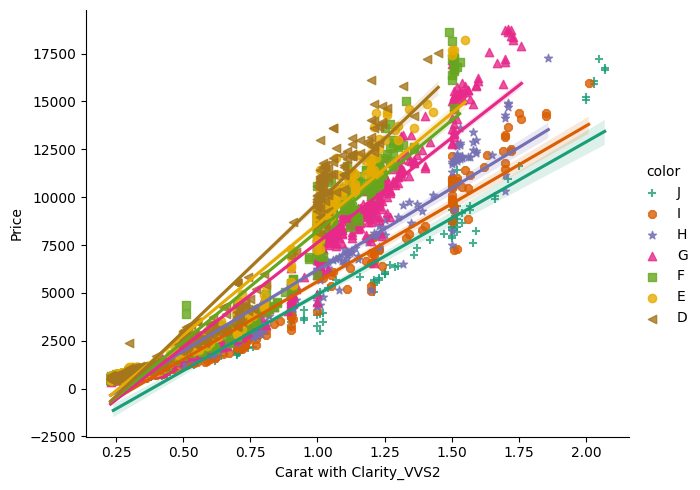

<Figure size 800x800 with 0 Axes>

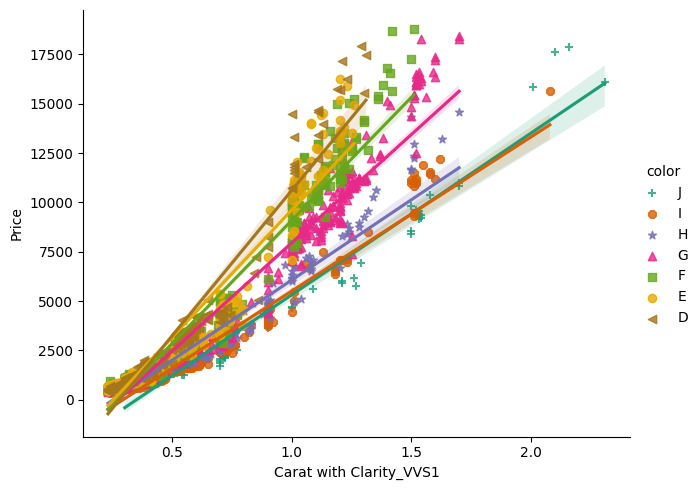

<Figure size 800x800 with 0 Axes>

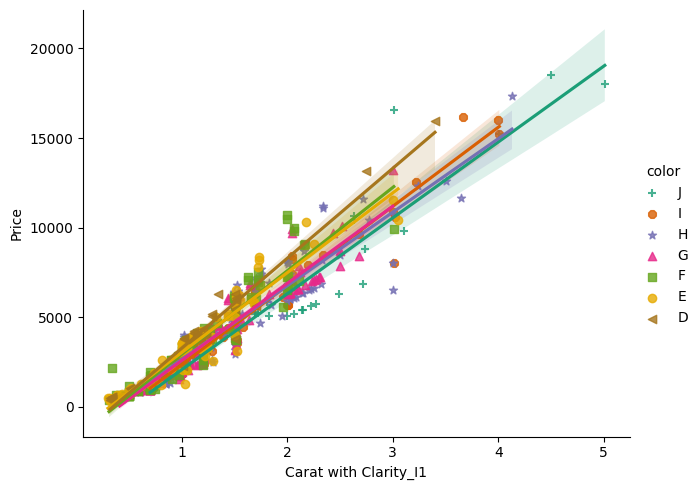

<Figure size 800x800 with 0 Axes>

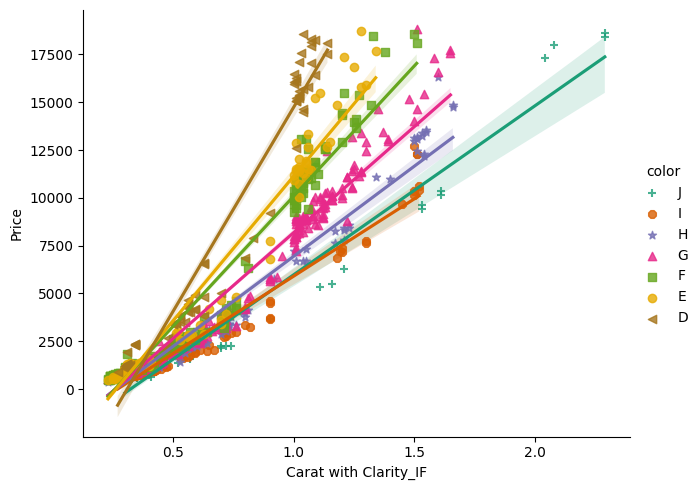

In [646]:
for i in df['clarity'].unique():
    plt.figure(figsize=(8,8))
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html  
    sns.lmplot(data = df[df['clarity'] == i], 
           x = 'carat', 
           y = 'price', 
           hue = 'color', 
           markers = ['+','8','*','^', ',','o','<'],
           palette = 'Dark2',
           height = 5,
           aspect = 1.3)
    plt.xlabel(f'Carat with Clarity_{i}')
    plt.ylabel('Price')

It seems that 'color' has a bigger impact then 'cut', especially for diamonds with greater clarity

Finally let's look at our numeric variables

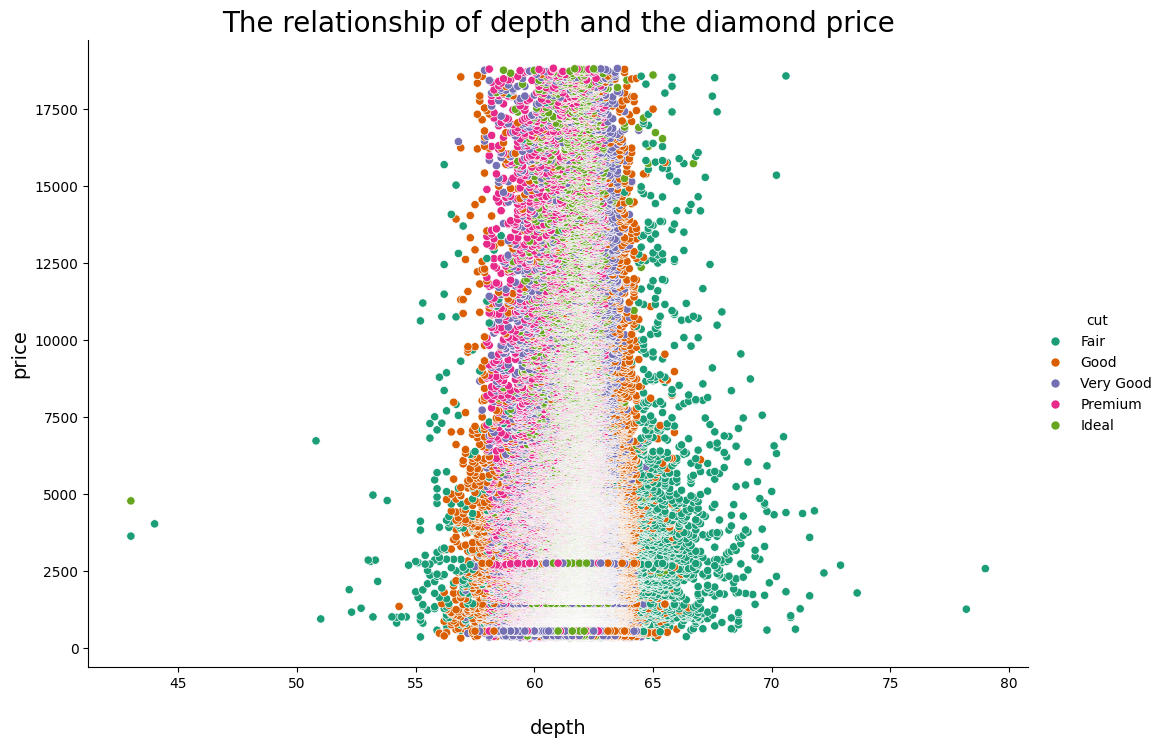

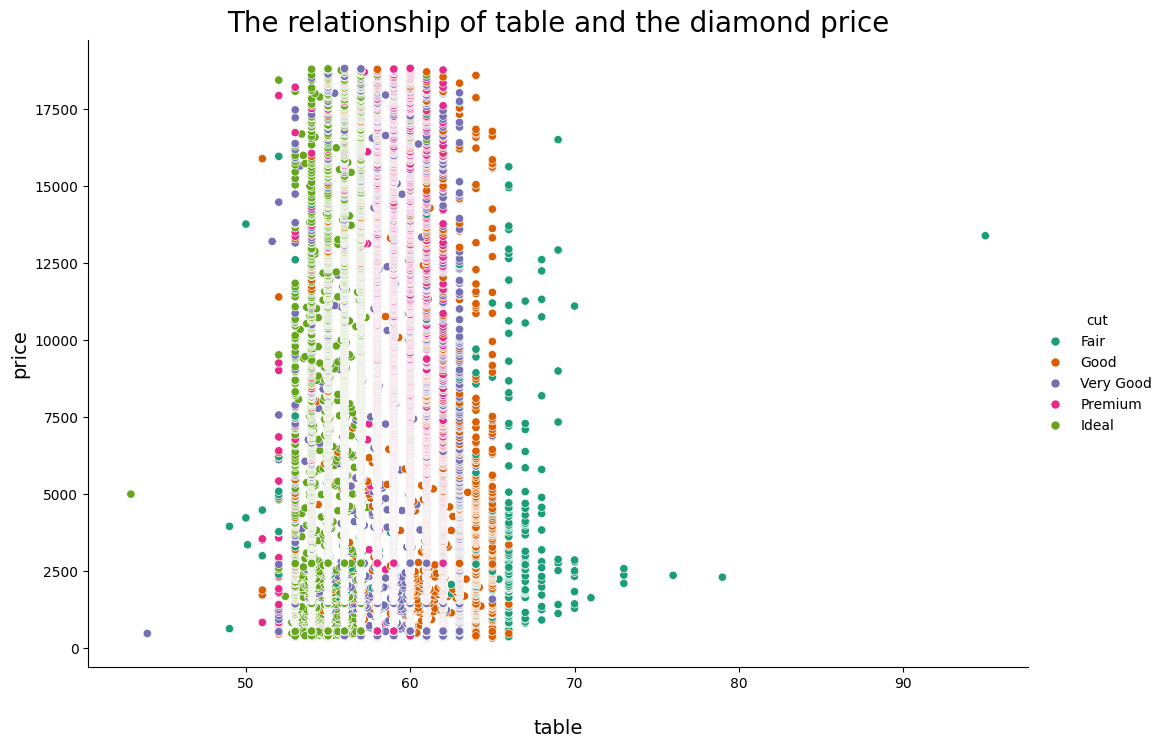

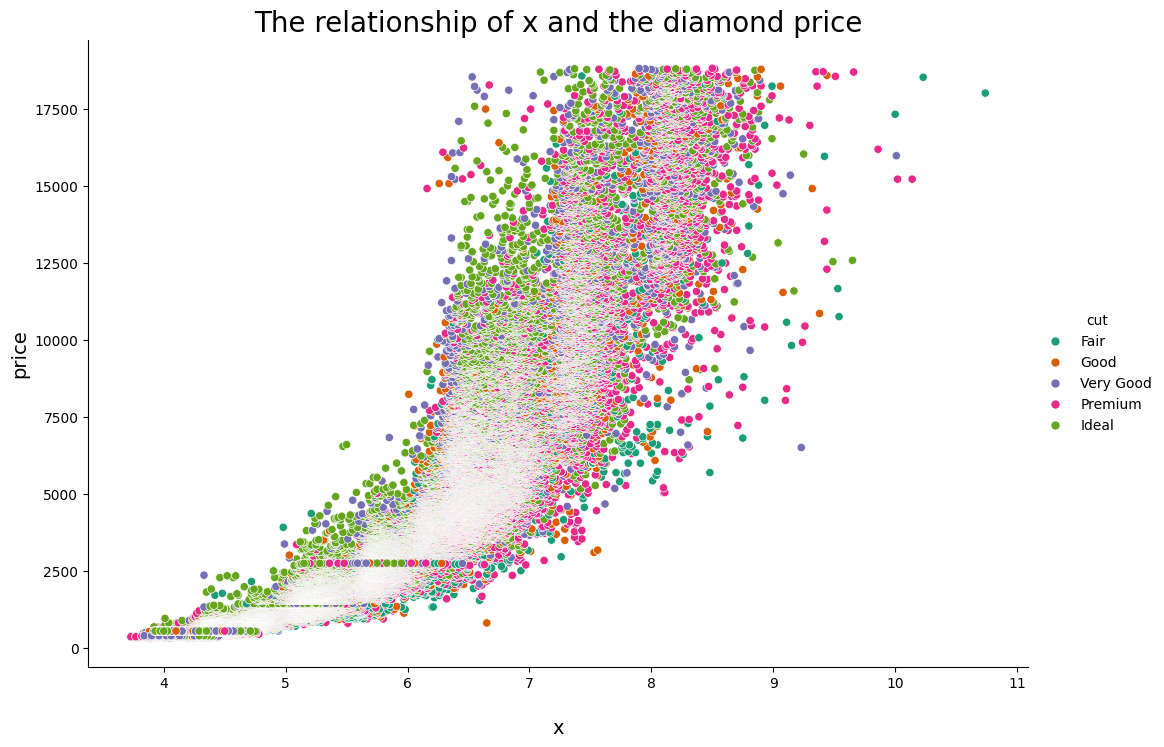

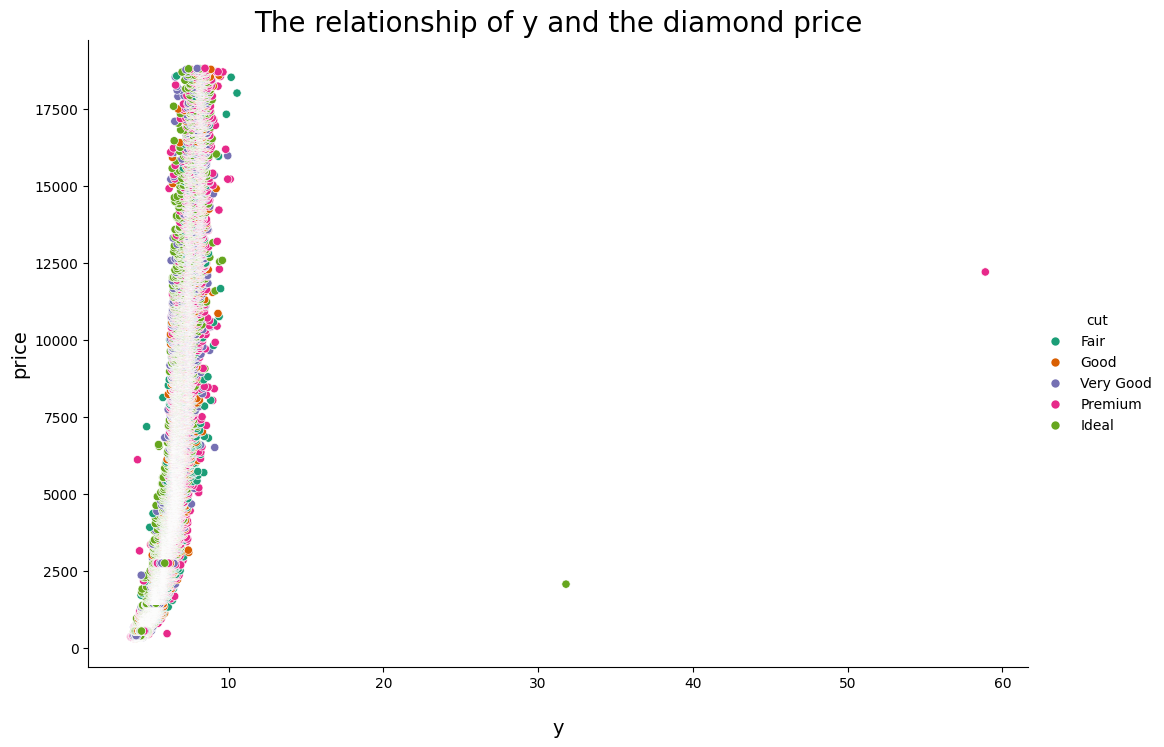

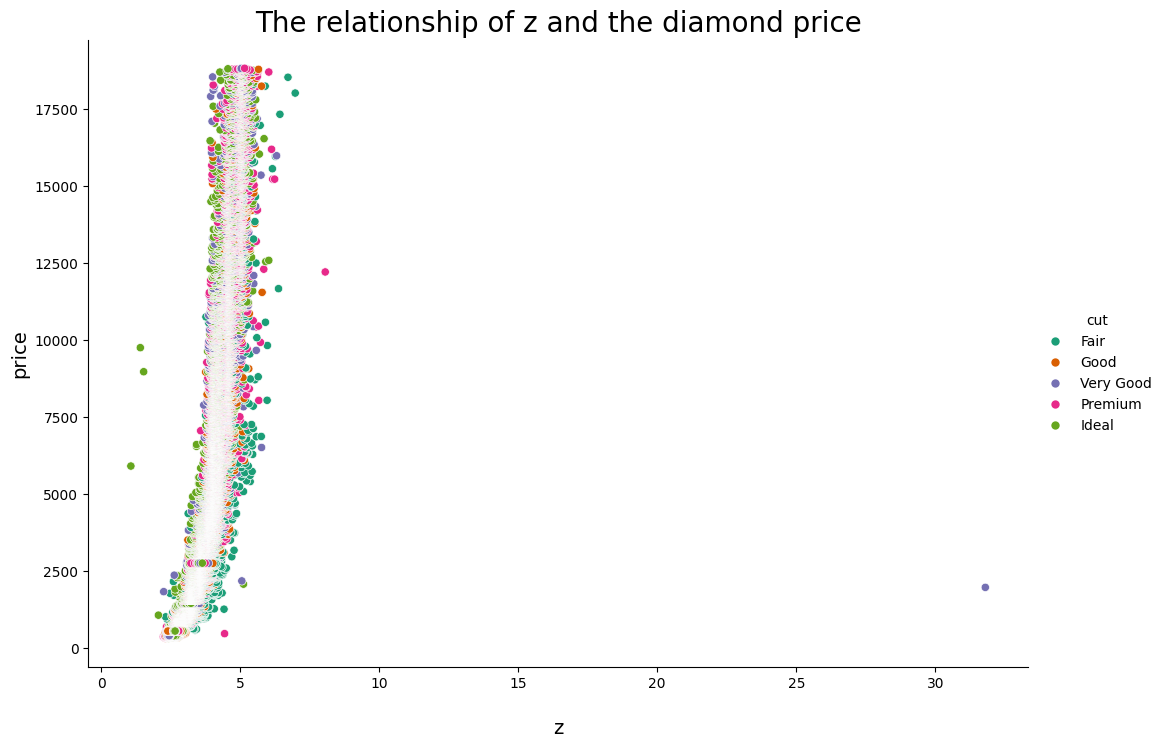

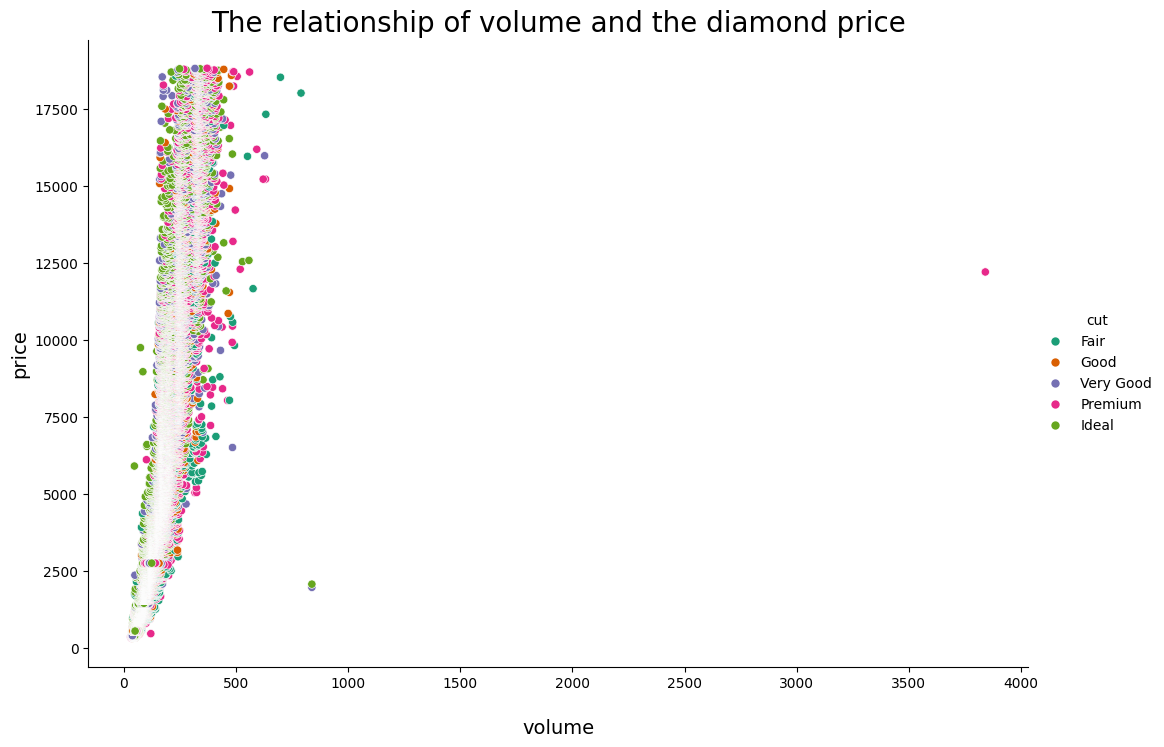

In [647]:
numeric_cols_ind = numeric_cols.drop(['carat','price'])

for col in numeric_cols_ind:
    sns.relplot(data = df, 
            x = df[col],
            y = 'price', 
            hue = 'cut',
            palette = 'Dark2',
            height = 7,
            aspect = 1.5,)
    plt.xlabel(col, fontsize = 14, labelpad = 20)     
    plt.ylabel('price', fontsize = 14)
    plt.title(f'The relationship of {col} and the diamond price', fontsize = 20);

Clear dependency from dimensional variables, but we already know that they have a very high correlation with 'carat'. As for 'depth' and 'table' the pattern is a little unclear (also we already know from the heatmap that correlation is very low).

3. Feature engineering

In [648]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [649]:
#dropping features with high correlation

In [650]:
df.drop(['x','y', 'z', 'volume'], axis = 1, inplace = True)
df

carat        cut color clarity  depth  table  price  carat_sq
1       0.23      Ideal     E     SI2   61.5   55.0    326    0.0529
2       0.21    Premium     E     SI1   59.8   61.0    326    0.0441
3       0.23       Good     E     VS1   56.9   65.0    327    0.0529
4       0.29    Premium     I     VS2   62.4   58.0    334    0.0841
5       0.31       Good     J     SI2   63.3   58.0    335    0.0961
...      ...        ...   ...     ...    ...    ...    ...       ...
53936   0.72      Ideal     D     SI1   60.8   57.0   2757    0.5184
53937   0.72       Good     D     SI1   63.1   55.0   2757    0.5184
53938   0.70  Very Good     D     SI1   62.8   60.0   2757    0.4900
53939   0.86    Premium     H     SI2   61.0   58.0   2757    0.7396
53940   0.75      Ideal     D     SI2   62.2   55.0   2757    0.5625

[53794 rows x 8 columns]

In [651]:
# Convert categorical variable to numerical
df['cut'] = df['cut'].map({'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5})
df['color'] = df['color'].map({'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1})
df['clarity'] = df['clarity'].map({'I1':1, 'SI1':2, 'SI2':3, 'VS1':4, 'VS2':5, 'VVS1':6, 'VVS2':7, 'IF':8})

We should not worry about missing values anymore as we have dropped all columns which contained them

In [652]:
# Separate the DataFrame into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels = ['price'], axis = 1),
                                                    df['price'],  
                                                    test_size = 0.3,  
                                                    random_state = 42)
# Get the shape of training and testing set
X_train.shape, X_test.shape

((37655, 7), (16139, 7))

In [653]:
scaler = MinMaxScaler()

In [654]:
scaler.fit(X_train) #tbh here I'm not sure of the order. Should I scale features which where categorical?

MinMaxScaler()

In [655]:
scaler.data_max_

array([ 5.01  ,  5.    ,  7.    ,  8.    , 79.    , 95.    , 25.1001])

In [656]:
scaler.data_min_

array([2.0e-01, 1.0e+00, 1.0e+00, 1.0e+00, 4.3e+01, 4.3e+01, 4.0e-02])

In [657]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [658]:
print('Mean: ', X_train_scaled.mean(axis=0))
print('Standard Deviation: ', X_train_scaled.std(axis=0))
print('Minimum value: ', X_train_scaled.min(axis=0))
print('Maximum value: ', X_train_scaled.max(axis=0))

Mean:  [0.12478463 0.725322   0.56708272 0.43921316 0.52090308 0.27803234
 0.03303007]
Standard Deviation:  [0.09913904 0.27886445 0.2841845  0.25261772 0.03971989 0.04295734
 0.04259676]
Minimum value:  [0. 0. 0. 0. 0. 0. 0.]
Maximum value:  [1. 1. 1. 1. 1. 1. 1.]


In [659]:
print('Mean: ', X_test_scaled.mean(axis=0))
print('Standard Deviation: ', X_test_scaled.std(axis=0))
print('Minimum value: ', X_test_scaled.min(axis=0))
print('Maximum value: ', X_test_scaled.max(axis=0))

Mean:  [0.12309795 0.72769379 0.56907698 0.44262788 0.5204928  0.27805972
 0.0320738 ]
Standard Deviation:  [0.09670117 0.27938215 0.28194782 0.25318168 0.03971654 0.04294943
 0.04074425]
Minimum value:  [0.         0.         0.         0.         0.         0.11538462
 0.        ]
Maximum value:  [0.72141372 1.         1.         1.         0.81111111 0.69230769
 0.53586777]


In [660]:
X_train_scaled #do I need to convert it to dataframe again?

array([[0.02079002, 1.        , 1.        , ..., 0.51944444, 0.26923077,
        0.0019952 ],
       [0.16839917, 1.        , 0.5       , ..., 0.51666667, 0.25      ,
        0.03910998],
       [0.16839917, 0.75      , 1.        , ..., 0.53888889, 0.32692308,
        0.03910998],
       ...,
       [0.02494802, 1.        , 0.        , ..., 0.52222222, 0.22884615,
        0.00249001],
       [0.14553015, 0.75      , 0.        , ..., 0.55      , 0.30769231,
        0.03072613],
       [0.16839917, 0.75      , 0.5       , ..., 0.54722222, 0.28846154,
        0.03910998]])

So we had converted categorical values into numeric and performed scaling

4. Modelling

In [661]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

45308    0.30
15893    1.01
22183    1.01
48311    0.25
32732    0.31
         ... 
11312    1.00
44870    0.63
38272    0.32
861      0.90
15833    1.01
Name: carat, Length: 37655, dtype: float64

In [692]:
baseline_model = LinearRegression()
X_train_base = X_train[['carat', 'carat_sq']]
X_test_base = X_test[['carat', 'carat_sq']]
baseline_model.fit(X_train_base, y_train)

LinearRegression()

In [695]:

y_hat_base_train = baseline_model.predict(X_train_base)
print(f"MSE_train: {np.round(mean_squared_error(y_train, y_hat_base_train),1)}")
print(f"RMSE_train: {np.round(root_mean_squared_error(y_train, y_hat_base_train),1)}")
print(f"MAE_train: {np.round(mean_absolute_error(y_train, y_hat_base_train),1)}")
print(f"R2_train: {np.round(baseline_model.score(X_train_base, y_hat_base_train),1)}")

y_hat_base = baseline_model.predict(X_test_base)
print(f"MSE: {np.round(mean_squared_error(y_test, y_hat_base),1)}")
print(f"RMSE: {np.round(root_mean_squared_error(y_test, y_hat_base),1)}")
print(f"MAE: {np.round(mean_absolute_error(y_test, y_hat_base),1)}")
print(f"R2: {np.round(baseline_model.score(X_test_base, y_hat_base),1)}") # the same as r2_score(y_test, y_hat)

MSE_train: 2389599.3
RMSE_train: 1545.8
MAE_train: 960.8
R2_train: 1.0
MSE: 2327402.8
RMSE: 1525.6
MAE: 951.8
R2: 1.0


In [662]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
print(f"intercept: {model.intercept_}")
model_coef = model.coef_
print(f'slope: {model_coef}')

intercept: -2005.5081831678426
slope: [38387.89845407   547.43650671  1693.05513456  2619.08209032
 -2099.73121676 -1639.77101332  6424.16812975]


In [663]:
df_coefs = pd.DataFrame(model.coef_.T, index = X_train.columns, columns=["Coefficient"]).sort_values("Coefficient").T
display(df_coefs)

depth        table         cut        color     clarity  \
Coefficient -2099.731217 -1639.771013  547.436507  1693.055135  2619.08209   

               carat_sq         carat  
Coefficient  6424.16813  38387.898454

In [664]:
y_hat_train = model.predict(X_train_scaled)
print(f"MSE_train: {np.round(mean_squared_error(y_train, y_hat_train),1)}")
print(f"RMSE_train: {np.round(root_mean_squared_error(y_train, y_hat_train),1)}")
print(f"MAE_train: {np.round(mean_absolute_error(y_train, y_hat_train),1)}")
print(f"R2_train: {np.round(model.score(X_train_scaled, y_train),1)}")

y_hat = model.predict(X_test_scaled)
print(f"MSE: {np.round(mean_squared_error(y_test, y_hat),1)}")
print(f"RMSE: {np.round(root_mean_squared_error(y_test, y_hat),1)}")
print(f"MAE: {np.round(mean_absolute_error(y_test, y_hat),1)}")
print(f"R2: {np.round(model.score(X_test_scaled, y_test),1)}") # the same as r2_score(y_test, y_hat)


MSE_train: 1740335.3
RMSE_train: 1319.2
MAE_train: 881.2
R2_train: 0.9
MSE: 1663934.9
RMSE: 1289.9
MAE: 865.9
R2: 0.9


In [665]:
residuals = y_hat - y_test

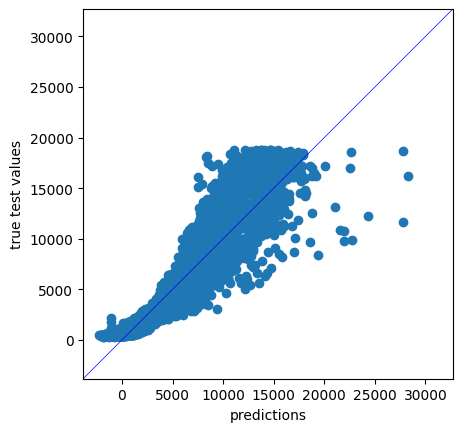

In [666]:
fig, ax = plt.subplots()

ax.scatter(y_hat, y_test)
ax.axline((0,0), slope = 1, c="b", lw=0.5)
ax.set_xlabel("predictions")
ax.set_ylabel("true test values")

# Create square plot
lims = ax.axis("square")
min_lim = min(lims[::2])
max_lim = max(lims[1::2])
ax.set_xlim(min_lim, max_lim)
ax.set_ylim(min_lim, max_lim);

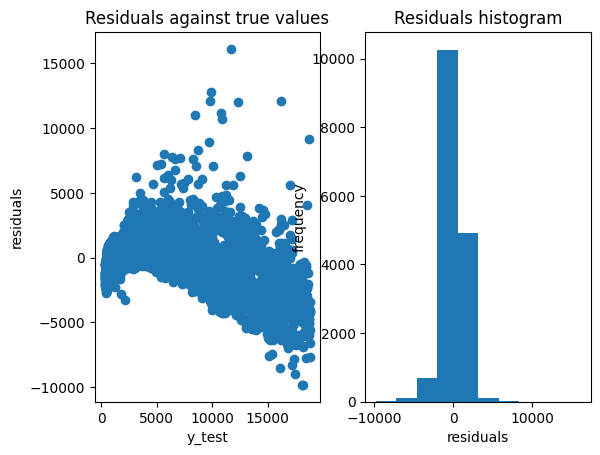

In [667]:
plt.subplot(1,2,1)
plt.scatter(y_test, residuals)
plt.ylabel("residuals")
plt.xlabel("y_test")
plt.title("Residuals against true values")

plt.subplot(1,2,2)
plt.hist(residuals)
plt.xlabel("residuals")
plt.ylabel("frequency")
plt.title("Residuals histogram")
plt.show();

We can see that residuals start pointing one direction as the value of y_test grows, so their behaviour is not a random noise.

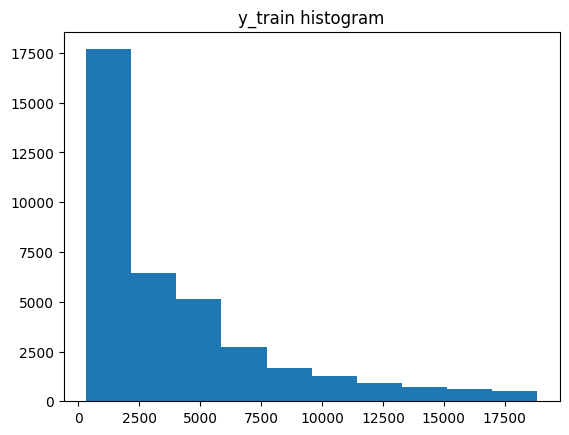

In [668]:
plt.title('y_train histogram')
plt.hist(y_train);

In [669]:
corr_model = X_train.corr()
corr_model

carat       cut     color   clarity     depth     table  carat_sq
carat     1.000000 -0.134380 -0.291809 -0.280325  0.028151  0.184106  0.952664
cut      -0.134380  1.000000  0.025497  0.179213 -0.225236 -0.431446 -0.107210
color    -0.291809  0.025497  1.000000  0.002378 -0.053678 -0.026891 -0.290567
clarity  -0.280325  0.179213  0.002378  1.000000 -0.069830 -0.144617 -0.233212
depth     0.028151 -0.225236 -0.053678 -0.069830  1.000000 -0.289658  0.025138
table     0.184106 -0.431446 -0.026891 -0.144617 -0.289658  1.000000  0.156515
carat_sq  0.952664 -0.107210 -0.290567 -0.233212  0.025138  0.156515  1.000000

In [670]:
data_train = pd.concat([X_train,y_train], axis=1)
data_train.corr()['price'].sort_values(ascending=False)

price       1.000000
carat       0.922220
carat_sq    0.890087
table       0.130121
depth      -0.013790
cut        -0.051796
clarity    -0.105676
color      -0.173526
Name: price, dtype: float64

Let's try adding second degree

In [671]:
poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(X_train_scaled)
x_test_poly = poly.transform(X_test_scaled)
  
model_poly = LinearRegression(fit_intercept=False)
model_poly.fit(x_train_poly, y_train)

y_hat_train = model_poly.predict(x_train_poly)
print(f"MSE_train: {np.round(mean_squared_error(y_train, y_hat_train),1)}")
print(f"RMSE_train: {np.round(root_mean_squared_error(y_train, y_hat_train),1)}")
print(f"MAE_train: {np.round(mean_absolute_error(y_train, y_hat_train),1)}")
print(f"R2_train: {np.round(model_poly.score(x_train_poly, y_train),1)}")
    
y_hat_poly = model_poly.predict(x_test_poly)

print(f"MSE: {np.round(mean_squared_error(y_test, y_hat_poly),1)}")
print(f"RMSE: {np.round(root_mean_squared_error(y_test, y_hat_poly),1)}")
print(f"MAE: {np.round(mean_absolute_error(y_test, y_hat_poly),1)}")
print(f"R2: {np.round(model_poly.score(x_test_poly, y_test),1)}")

#poly_names = poly.get_feature_names_out()
#pd.DataFrame(model_poly.coef_, index = ["Coefficient"], columns = poly.get_feature_names_out()) I have an error here so I commented it :-(


MSE_train: 945784.6
RMSE_train: 972.5
MAE_train: 598.6
R2_train: 0.9
MSE: 874119.3
RMSE: 934.9
MAE: 581.6
R2: 0.9


In [672]:
residuals_poly = y_hat_poly - y_test

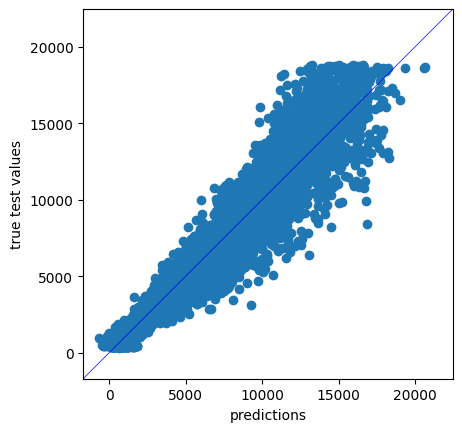

In [673]:
fig, ax = plt.subplots()

ax.scatter(y_hat_poly, y_test)
ax.axline((0,0), slope = 1, c="b", lw=0.5)
ax.set_xlabel("predictions")
ax.set_ylabel("true test values")

# Create square plot
lims = ax.axis("square")
min_lim = min(lims[::2])
max_lim = max(lims[1::2])
ax.set_xlim(min_lim, max_lim)
ax.set_ylim(min_lim, max_lim);

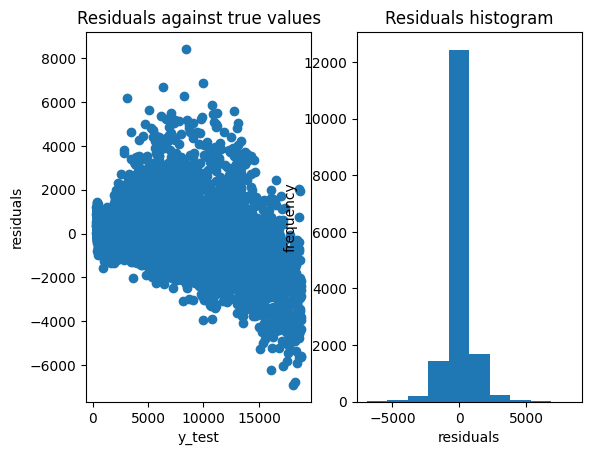

In [674]:
plt.subplot(1,2,1)
plt.scatter(y_test, residuals_poly)
plt.ylabel("residuals")
plt.xlabel("y_test")
plt.title("Residuals against true values")

plt.subplot(1,2,2)
plt.hist(residuals_poly)
plt.xlabel("residuals")
plt.ylabel("frequency")
plt.title("Residuals histogram")
plt.show();

Still the residuals pattern doesn't look random

Let's try regularized models

In [675]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_poly)
X_test_scaled = scaler.transform(x_test_poly)

In [676]:
lr_l = Lasso()
lr_l.fit(X_train_scaled, y_train)

y_hat_train = lr_l.predict(X_train_scaled)
y_hat_test = lr_l.predict(X_test_scaled)

print(f"RMSE train: {root_mean_squared_error(y_train, y_hat_train)}")
print(f"RMSE test: {root_mean_squared_error(y_test, y_hat_test)}")

RMSE train: 1009.4041404426132
RMSE test: 966.8586899324407


C:\My Folder\Masterclass\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.098e+10, tolerance: 6.077e+07
  model = cd_fast.enet_coordinate_descent(


C:\Users\vsr3204\AppData\Local\Temp\ipykernel_20960\1853594288.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rmses = pd.concat([rmses, pd.DataFrame([{"alpha": alpha, "train": rmse_train, "test": rmse_test}])], axis=0, ignore_index=True)


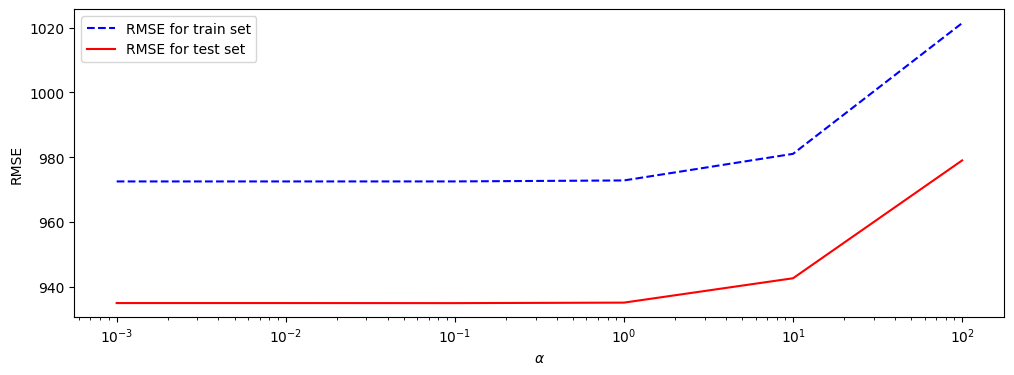

In [677]:

rmses = pd.DataFrame(columns=["alpha", "train", "test"])
alphas = [10**i for i in range(-3, 3)]

for alpha in alphas:    
    lr_r = Ridge(alpha=alpha)
    lr_r.fit(X_train_scaled, y_train)
    y_hat_train = lr_r.predict(X_train_scaled)
    y_hat_test = lr_r.predict(X_test_scaled)
    rmse_train = root_mean_squared_error(y_train, y_hat_train)
    rmse_test = root_mean_squared_error(y_test, y_hat_test)
    rmses = pd.concat([rmses, pd.DataFrame([{"alpha": alpha, "train": rmse_train, "test": rmse_test}])], axis=0, ignore_index=True)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot("alpha", "train", data=rmses, label="RMSE for train set", c="b", ls="--")
ax.plot("alpha", "test", data=rmses, label="RMSE for test set", c="r")

ax.set_xscale("log")
ax.legend()
ax.set_xlabel(r"$\alpha$")
ax.set_ylabel("RMSE")

plt.show();

In [678]:
lr_en = ElasticNet(l1_ratio=0.5, alpha=1, positive=False)
lr_en.fit(X_train_scaled, y_train)

y_hat_train = lr_en.predict(X_train_scaled)
y_hat_test = lr_en.predict(X_test_scaled)

rmse_train = root_mean_squared_error(y_train, y_hat_train)
rmse_test = root_mean_squared_error(y_test, y_hat_test)

print(f"RMSE train: {rmse_train}")
print(f"RMSE test: {rmse_test}")

RMSE train: 1138.4628161813507
RMSE test: 1100.647716003611


In [ ]:
'''my thoughts on the result: perhaps either there are too many features or there is something wrong on the scaling step, so the model performance is dropping'''

5. Model evaluation